In [328]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, ClusterCentroids
from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier

from imblearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
import sys

sys.path.append('../../')
from RF_atomver import *

In [329]:
max_cols = ['accuracy', 'precision', 'recall', 'specificity',
       'TN',  'TP', 'ROC-AUC', 'MCC', 'Balanced Accuracy','f1']
min_cols = ['FN', 'FP']
# max_rows = test_df.groupby('model')[max_cols].max()
metric_cols = ['accuracy', 'precision', 'recall', 'specificity',
             'ROC-AUC', 'MCC', 'Balanced Accuracy','f1','cm', 'NEK', 'model', 'feat_type', 'strategy']

In [324]:
# GP Model
result_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/GP/GP_results/'
data_dir = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/'
nek_nums = [2,3,5,9]
samplings = ['scaled', 'UNDER', 'SMOTE', 'ADASYN'] 
features = ['moe', 'mfp']
NEK= 'NEK'

train_results = [] 
test_results = [] 
train_model_names= []
test_model_names=[]
for i, n in enumerate(nek_nums):
    nek = str(n)
    # print(f'NEK{nek}')
    nek_path= f'{data_dir}NEK{nek}/bind/'
    for k, feat in enumerate(features): 
        print()
        for j, samp in enumerate(samplings): 
        
            print(f'NEK{nek} bind {feat} {samp}')
            file_root = f'NEK{nek}_binding_{feat}_{samp}'
       
            train = pd.read_csv(result_path+file_root+'_train_GP.csv') 
            test = pd.read_csv(result_path+file_root+'_test_GP.csv') 
            # df.iloc[[0]]
            train_model_names.append(train['model'].iloc[0])
            test_model_names.append(test['model'].iloc[0])
            train_results.append(train.iloc[[0]][metric_cols].values.flatten())
            test_results.append(test.iloc[[0]][metric_cols].values.flatten())
            
            # print()

    # print()
    
    if n == 2 or n == 9:

        nek_path= f'{data_dir}NEK{nek}/inhib/'
        for k, feat in enumerate(features): 
            print()
            for j, samp in enumerate(samplings): 
                file_root = f'NEK{nek}_inhibition_{feat}_{samp}'
                print(f'NEK{nek} inbhib {feat} {samp}')
                train = pd.read_csv(result_path+file_root+'_train_GP.csv') 
                test = pd.read_csv(result_path+file_root+'_test_GP.csv') 
                train_model_names.append(train['model'].iloc[0])
                test_model_names.append(test['model'].iloc[0])
                train_results.append(train.iloc[[0]][metric_cols].values.flatten())
                test_results.append(test.iloc[[0]][metric_cols].values.flatten())
       
            
    print()


NEK2 bind moe scaled
NEK2 bind moe UNDER
NEK2 bind moe SMOTE
NEK2 bind moe ADASYN

NEK2 bind mfp scaled
NEK2 bind mfp UNDER
NEK2 bind mfp SMOTE
NEK2 bind mfp ADASYN

NEK2 inbhib moe scaled
NEK2 inbhib moe UNDER
NEK2 inbhib moe SMOTE
NEK2 inbhib moe ADASYN

NEK2 inbhib mfp scaled
NEK2 inbhib mfp UNDER
NEK2 inbhib mfp SMOTE
NEK2 inbhib mfp ADASYN


NEK3 bind moe scaled
NEK3 bind moe UNDER
NEK3 bind moe SMOTE
NEK3 bind moe ADASYN

NEK3 bind mfp scaled
NEK3 bind mfp UNDER
NEK3 bind mfp SMOTE
NEK3 bind mfp ADASYN


NEK5 bind moe scaled
NEK5 bind moe UNDER
NEK5 bind moe SMOTE
NEK5 bind moe ADASYN

NEK5 bind mfp scaled
NEK5 bind mfp UNDER
NEK5 bind mfp SMOTE
NEK5 bind mfp ADASYN


NEK9 bind moe scaled
NEK9 bind moe UNDER
NEK9 bind moe SMOTE
NEK9 bind moe ADASYN

NEK9 bind mfp scaled
NEK9 bind mfp UNDER
NEK9 bind mfp SMOTE
NEK9 bind mfp ADASYN

NEK9 inbhib moe scaled
NEK9 inbhib moe UNDER
NEK9 inbhib moe SMOTE
NEK9 inbhib moe ADASYN

NEK9 inbhib mfp scaled
NEK9 inbhib mfp UNDER
NEK9 inbhib mf

In [333]:

train_df = pd.DataFrame(train_results, columns=metric_cols)
test_df = pd.DataFrame(test_results, columns=metric_cols)
test_df =  pd.DataFrame(test_results,columns=metric_cols)
test_df['strategy'] = test_df['strategy'].str.replace('scaled', 'raw')
test_df['model'] = test_df['model'].str.replace('scaled', 'raw')
train_df['strategy'] = train_df['strategy'].str.replace('scaled', 'raw')
train_df['model'] = train_df['model'].str.replace('scaled', 'raw')
test_df['dataset_category'] = test_df['feat_type'].astype(str)+'_'+test_df['strategy']

# train_df['model'] = train_model_names
# test_df['model'] = test_model_names
# train_df['NEK'] = train_df['model'].str[0:4]+'_'+train_df['model'].str.extract(r'_(.*?)_', expand=False)
# test_df['NEK'] = test_df['model'].str[0:4]+'_'+test_df['model'].str.extract(r'_(.*?)_', expand=False)
# train_df['strategy'] = train_df['model'].str[-10:-1].str.extract(r'_(.*?)_', expand=False)
# test_df['strategy'] = test_df['model'].str[-10:-1].str.extract(r'_(.*?)_', expand=False)
# train_df['feat_type'] = train_df['model'].str[-15:-1].str.extract(r'_(.*?)_', expand=False)
# test_df['feat_type'] = test_df['model'].str[-15:-1].str.extract(r'_(.*?)_', expand=False)
test_df

,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,cm,NEK,model,feat_type,strategy,dataset_category
0,0.957597,0.000000,0.000000,1.000000,0.500000,0.000000,0.500000,0.000000,"[271, 0, 12, 0]",NEK2_binding,NEK2_binding_moe_raw_GP,moe,raw,moe_raw
1,0.738516,0.102564,0.666667,0.741697,0.704182,0.184161,0.704182,0.177778,"[201, 70, 4, 8]",NEK2_binding,NEK2_binding_moe_UNDER_GP,moe,UNDER,moe_UNDER
2,0.971731,1.000000,0.333333,1.000000,0.666667,0.569013,0.666667,0.500000,"[271, 0, 8, 4]",NEK2_binding,NEK2_binding_moe_SMOTE_GP,moe,SMOTE,moe_SMOTE
3,0.961131,0.571429,0.333333,0.988930,0.661132,0.418102,0.661132,0.421053,"[268, 3, 8, 4]",NEK2_binding,NEK2_binding_moe_ADASYN_GP,moe,ADASYN,moe_ADASYN
4,0.957597,0.000000,0.000000,1.000000,0.500000,0.000000,0.500000,0.000000,"[271, 0, 12, 0]",NEK2_binding,NEK2_binding_mfp_raw_GP,mfp,raw,mfp_raw
5,0.954064,0.000000,0.000000,0.996310,0.498155,-0.012531,0.498155,0.000000,"[270, 1, 12, 0]",NEK2_binding,NEK2_binding_mfp_UNDER_GP,mfp,UNDER,mfp_UNDER
6,0.964664,1.000000,0.166667,1.000000,0.583333,0.400918,0.583333,0.285714,"[271, 0, 10, 2]",NEK2_binding,NEK2_binding_mfp_SMOTE_GP,mfp,SMOTE,mfp_SMOTE
7,0.964664,1.000000,0.166667,1.000000,0.583333,0.400918,0.583333,0.285714,"[271, 0, 10, 2]",NEK2_binding,NEK2_binding_mfp_ADASYN_GP,mfp,ADASYN,mfp_ADASYN
8,0.931540,0.000000,0.000000,1.000000,0.500000,0.000000,0.500000,0.000000,"[381, 0, 28, 0]",NEK2_inhibition,NEK2_inhibition_moe_raw_GP,moe,raw,moe_raw
9,0.865526,0.309859,0.785714,0.871391,0.828553,0.438116,0.828553,0.444444,"[332, 49, 6, 22]",NEK2_inhibition,NEK2_inhibition_moe_UNDER_GP,moe,UNDER,moe_UNDER


In [337]:
size_df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/dataset_creation/all_NEK_dataset_sizes.csv')
size_df['train actives/total%'] = size_df['actives_train']/size_df['total_size']*100

tempcols = ['NEK', 'strategy', 'feat_type', 'model','RF_type','num_samples_train','actives_train', 'active%_train', 'num_samples_test', 'actives_test',
       'active%_test', 'total_size', 'total_actives', 'total actives/total%']
size_cols = ['num_samples_train','actives_train', 'active%_train', 'num_samples_test', 'actives_test',
       'active%_test', 'total_size', 'total_actives', 'total actives/total%','train actives/total%']
for i, nek in enumerate(neks): 
    for j,samp in enumerate(test_df['strategy'].unique()):
        ds_idx = test_df[(test_df ['NEK']==nek) & (test_df['strategy']==samp)].index
        sizedf_idx = size_df[(size_df['NEK']==nek) & (size_df['strategy']==samp)].iloc[0]

        test_df.loc[ds_idx, size_cols] = sizedf_idx[size_cols].values
        test_df[(test_df['NEK']==nek) & (test_df['strategy']==samp)]


# add ratio of active
don't have to do this for now


In [326]:
data_dir = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/'
test_active_ratio = [] 
test0count = [] 
test1count = []
count = 0
train_active_ratio = []
for n in nek_list:
    for i, feat in enumerate(feat_types): 
        for j, samp in enumerate(samplings): 
            count+=1
            data_path = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/bind/'
            df_name = f'NEK{n}_binding_{feat}_{samp}_df.csv'
            # elif i == 'inhibition':
            #     data_path = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/inhib/'

            df = pd.read_csv(data_path+df_name)
            print(f'{count}. {df_name}')
            test = df[df['subset'] == 'test']['active'].value_counts()
            train = df[df['subset'] == 'train']['active'].value_counts()
            test0 = test[0]
            test1 = test[1] 
            total=test0+test1
            ratio_active = test1/total
            test_active_ratio.append(ratio_active) 
            test0count.append(test0)
            test1count.append(test1)
            train_ratio = train[1]/train[0]+train[1]
            train_active_ratio.append(train_ratio)
     
          
            if n == '2' or n == '9':
                data_path = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/inhib/'
                df_name = f'NEK{n}_inhibition_{feat}_{samp}_df.csv'

                df = pd.read_csv(data_path+df_name)
                count+=1
                print(f'{count}. {df_name}')
                test = df[df['subset'] == 'test']['active'].value_counts()
                train = df[df['subset'] == 'train']['active'].value_counts()
                test0 = test[0]
                test1 = test[1] 
                total=test0+test1
                ratio_active = test1/total
                test_active_ratio.append(ratio_active) 
                test0count.append(test0)
                test1count.append(test1)
                train_ratio = train[1]/train[0]+train[1]
                train_active_ratio.append(train_ratio)
                # print()
active_data = {'inactive': test0count, 'active':test1count, 'percent_active': test_active_ratio}
test_df['inactive'] = test0count
test_df['active'] = test1count
test_df['percent_active']=test_active_ratio
test_df['train_percent_active'] = train_active_ratio



1. NEK2_binding_moe_scaled_df.csv
2. NEK2_inhibition_moe_scaled_df.csv
3. NEK2_binding_moe_UNDER_df.csv
4. NEK2_inhibition_moe_UNDER_df.csv
5. NEK2_binding_moe_SMOTE_df.csv
6. NEK2_inhibition_moe_SMOTE_df.csv
7. NEK2_binding_moe_ADASYN_df.csv
8. NEK2_inhibition_moe_ADASYN_df.csv
9. NEK2_binding_mfp_scaled_df.csv
10. NEK2_inhibition_mfp_scaled_df.csv
11. NEK2_binding_mfp_UNDER_df.csv
12. NEK2_inhibition_mfp_UNDER_df.csv
13. NEK2_binding_mfp_SMOTE_df.csv
14. NEK2_inhibition_mfp_SMOTE_df.csv
15. NEK2_binding_mfp_ADASYN_df.csv
16. NEK2_inhibition_mfp_ADASYN_df.csv
17. NEK3_binding_moe_scaled_df.csv
18. NEK3_binding_moe_UNDER_df.csv
19. NEK3_binding_moe_SMOTE_df.csv
20. NEK3_binding_moe_ADASYN_df.csv
21. NEK3_binding_mfp_scaled_df.csv
22. NEK3_binding_mfp_UNDER_df.csv
23. NEK3_binding_mfp_SMOTE_df.csv
24. NEK3_binding_mfp_ADASYN_df.csv
25. NEK5_binding_moe_scaled_df.csv
26. NEK5_binding_moe_UNDER_df.csv
27. NEK5_binding_moe_SMOTE_df.csv
28. NEK5_binding_moe_ADASYN_df.csv
29. NEK5_binding_mf

# Display metrics with sampling strategy on x 

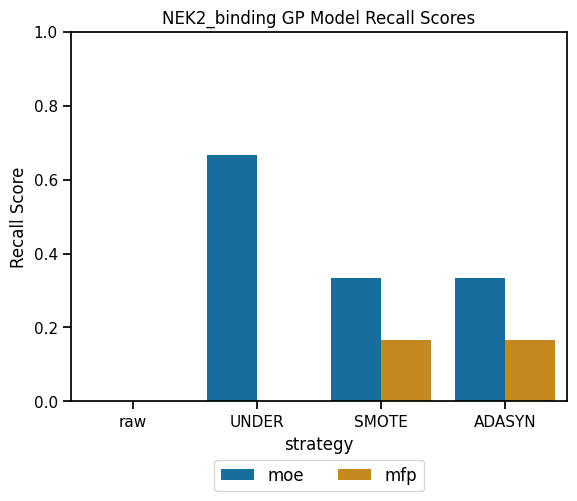

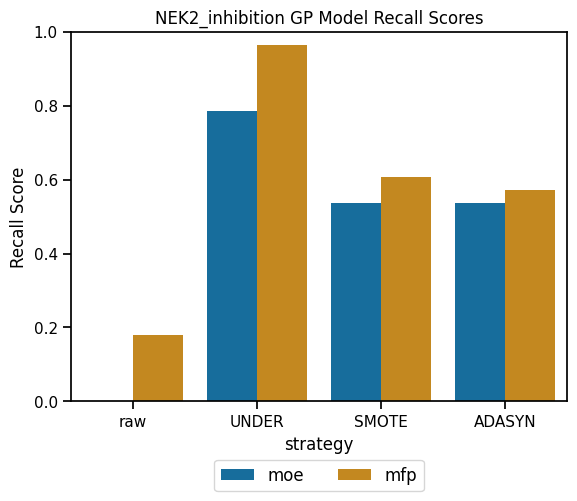

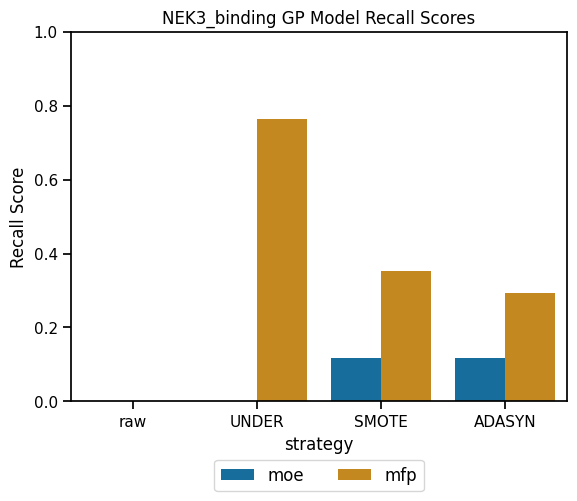

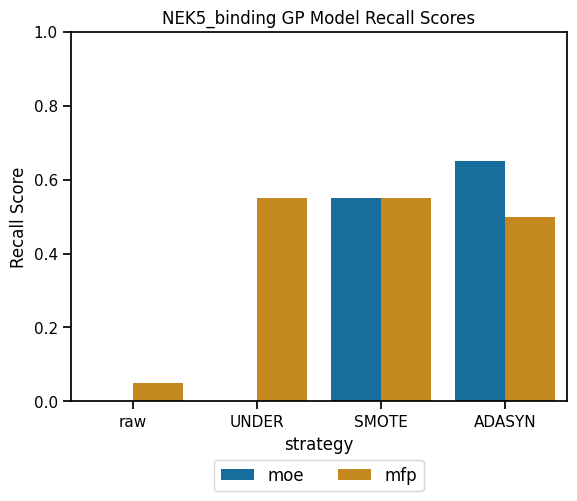

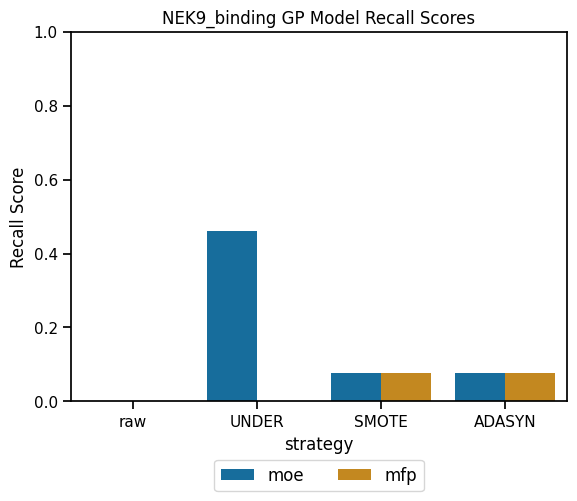

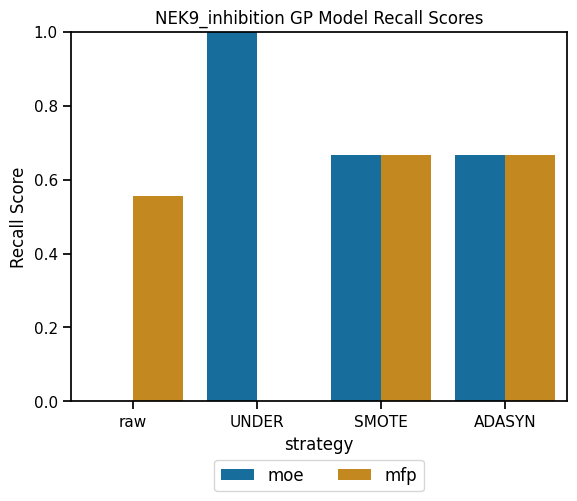

In [352]:
# neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
# # value_vars=['accuracy','precision', 'recall','specificity', 'ROC-AUC', 'MCC', 'Balanced Accuracy','f1']
# value_vars=['recall']
# for n, nek in enumerate(neks): 
#     nek_df = test_df[test_df['NEK'] ==nek]
#     print(nek) 
#     dflong=nek_df.melt(id_vars=['strategy', 'feat_type', 'model','cm'], value_vars=['recall'],
#            var_name='Metric', value_name='Metric_value')
#     dflong=dflong.sort_values('Metric')

#     sns.set_context('notebook')
#     sns.set_palette('colorblind')
#     # grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=3, s=70, jitter=0.2)
#     grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=2)
#     # kwargs={'loc':(0.79, 0.15)}
#     sns.move_legend(grid, (0.65, 0.5))
#     grid.fig.subplots_adjust(top=0.95)
#     plt.ylabel('Recall Score')

#     grid.fig.suptitle(f'GP Model Results {nek}');
#     plt.savefig(f"figures/GP_{nek}_metrics_catplot_xsamp.png")
    
#     plt.show();
    
#     print()
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for n, nek in enumerate(neks): 
    nek_df = test_df[test_df['NEK'] ==nek]
    sns.set_context('notebook')
    sns.set_palette('colorblind')
    # grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=3, s=70, jitter=0.2)
    # grid=sns.catplot(nek_df, x='strategy', y='recall', hue='feat_type', kind='bar', col_wrap=2)
    grid = sns.barplot(nek_df, x='strategy', y='recall', hue='feat_type')
    # kwargs={'loc':(0.79, 0.15)}
    # sns.move_legend(grid, (1, 0.5))
    # grid.fig.subplots_adjust(to
    # grid.get_legend().remove()
    grid.set(ylim=(0,1))
    grid.legend(loc='center', bbox_to_anchor=(0.5,-.2), ncol=2,fontsize=12)
    plt.ylabel('Recall Score')
    plt.title(f'{nek} GP Model Recall Scores')
    # grid.suptitle(f'GP Model Results {nek}');
    plt.savefig(f"figures/GP_plots/GP_{nek}_recall_bystrat.png",bbox_inches='tight')
    plt.show();
    
    print()


# Display metrics with feat type on x 

In [466]:
raws = sns.color_palette('Grays', 1) 
smotes = sns.color_palette('Greens', 1)
unders = sns.color_palette('Reds',1) # Purples, RdPu, Reds, YlGn, YlGnBu, YlOrBr, YlOrRd, BuPu, BuGn , dark:salmon_r
adasyns = sns.color_palette('Purples',1)
sampling_palette = raws+smotes+unders+adasyns
moes = sns.color_palette('Blues', 4) 
mfps = sns.color_palette('YlOrBr', 4)
dataset_palette = moes+mfps

NEK2_binding


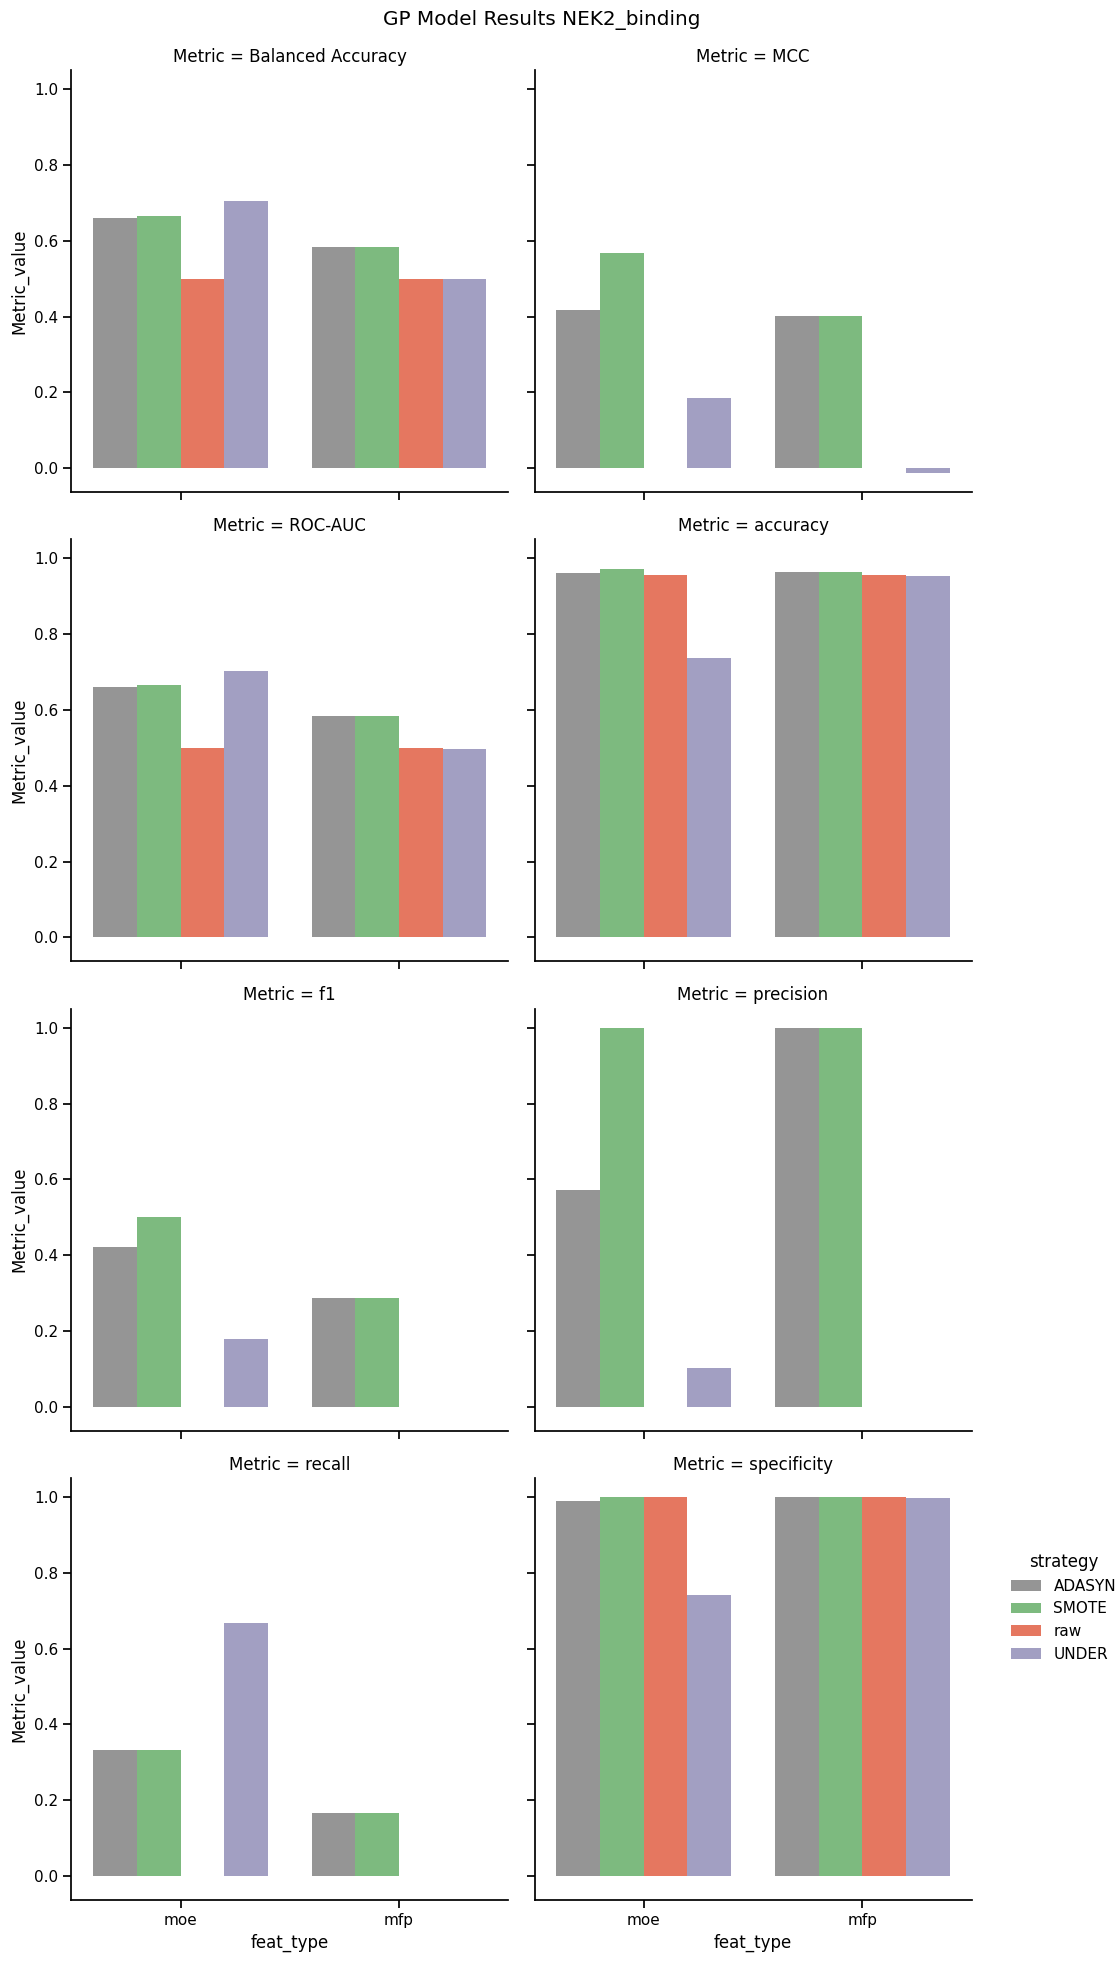


NEK2_inhibition


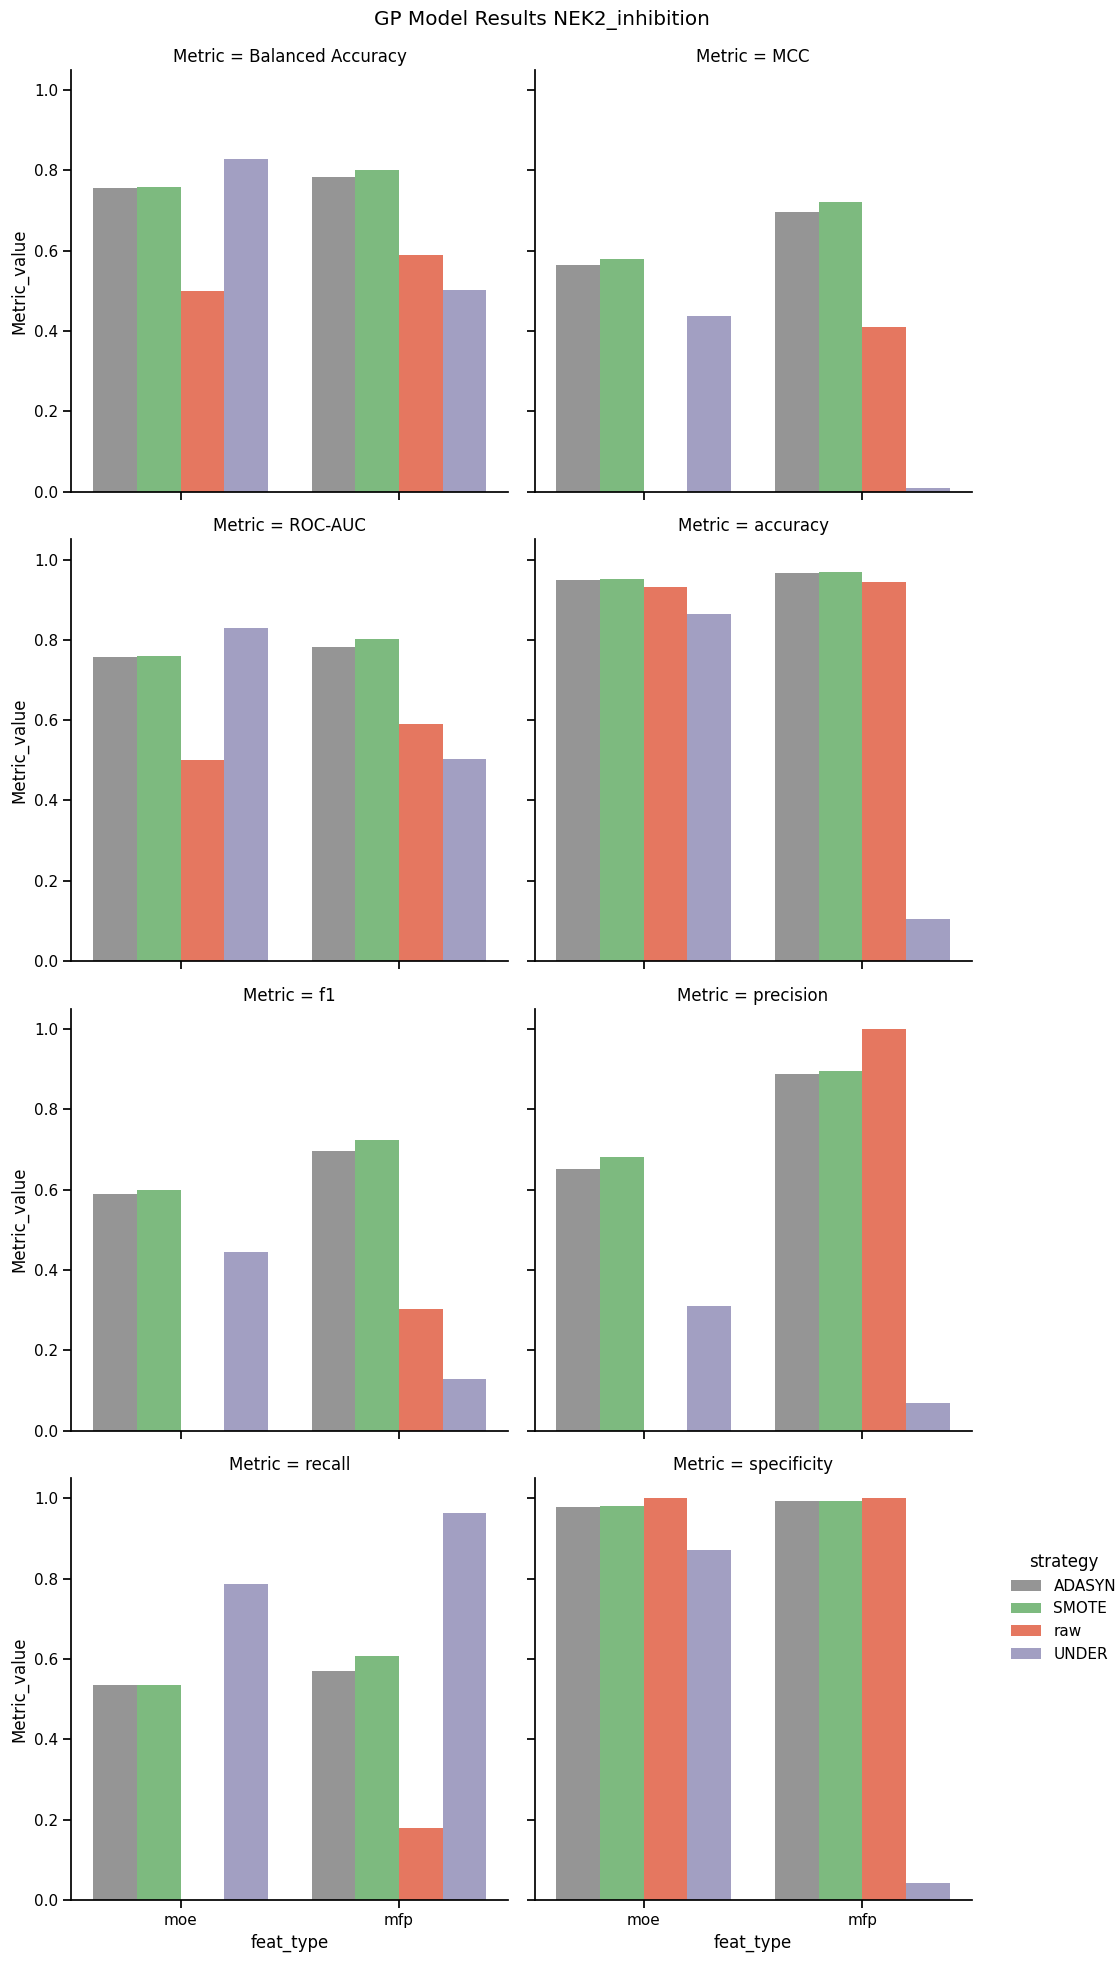


NEK3_binding


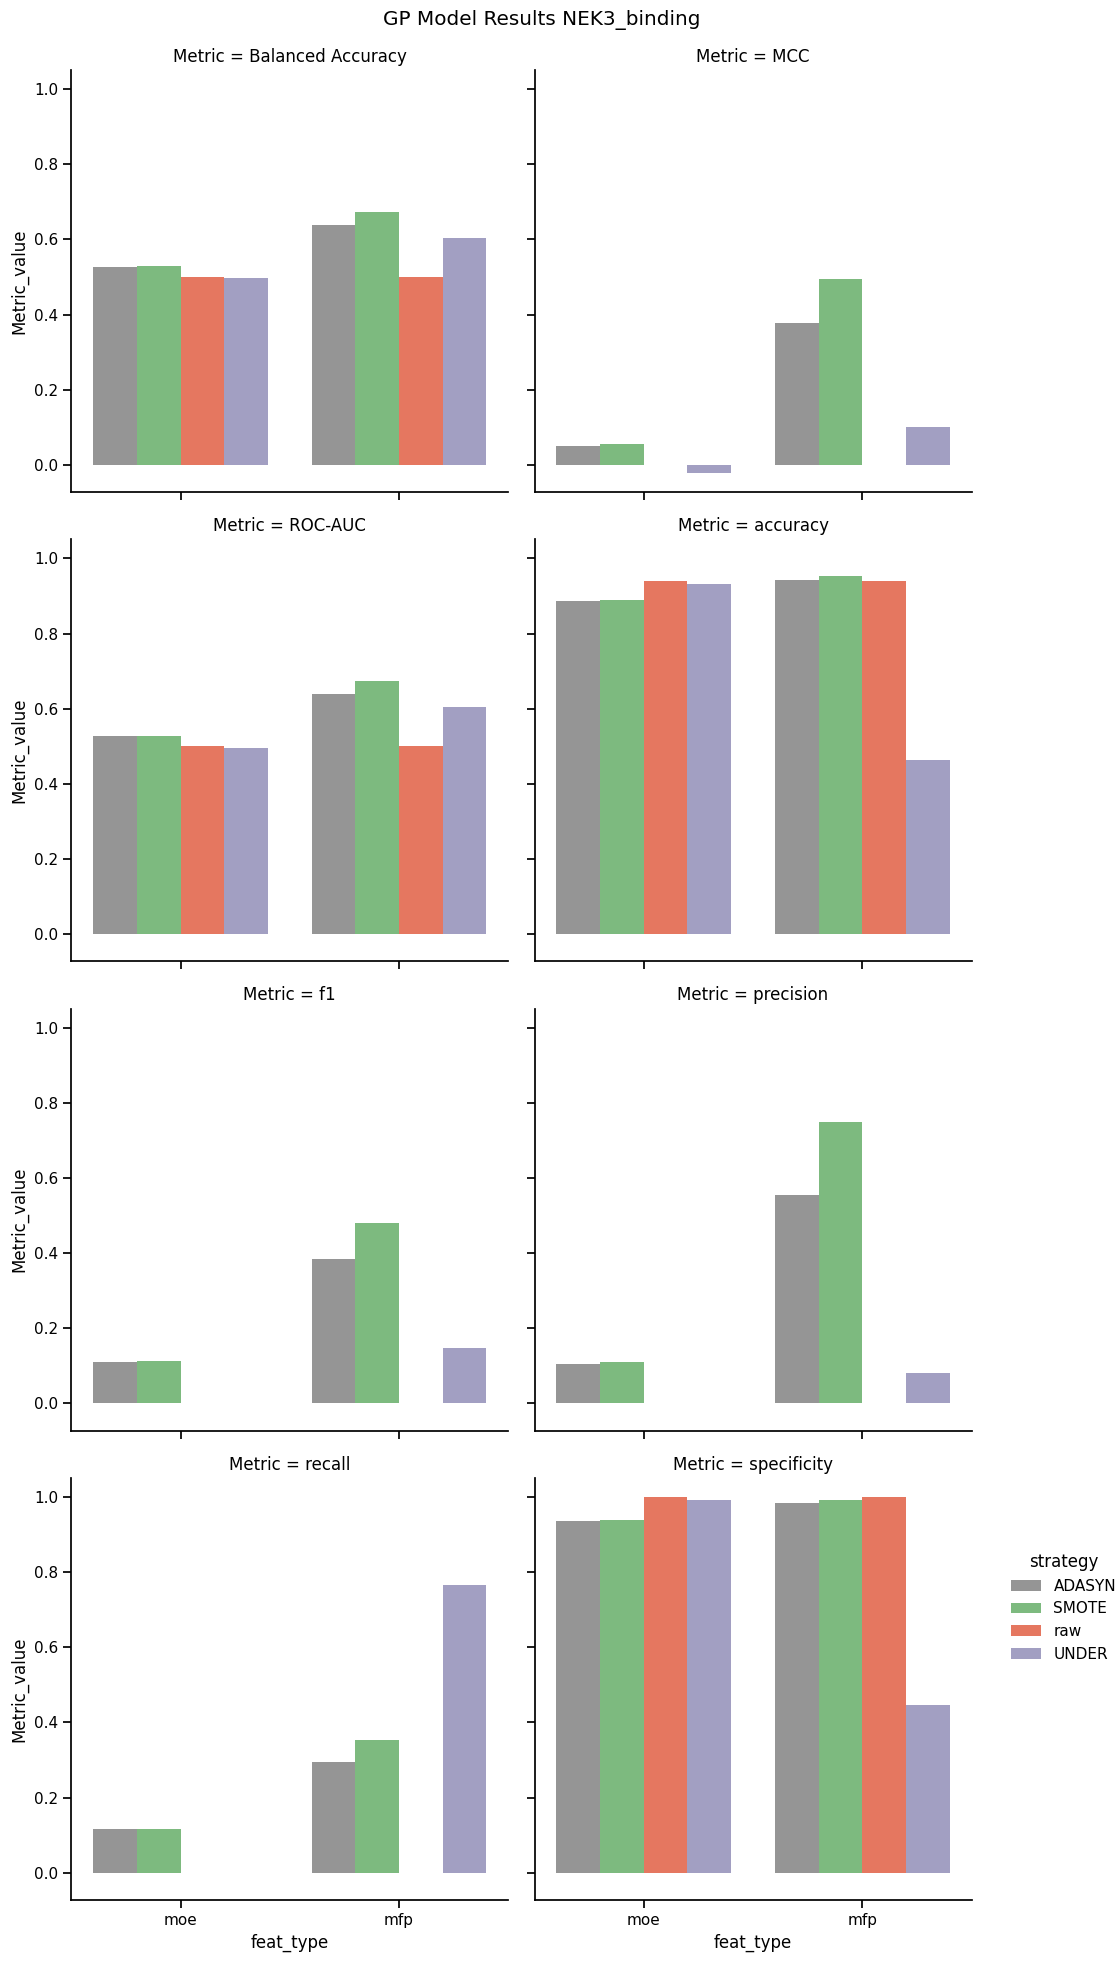


NEK5_binding


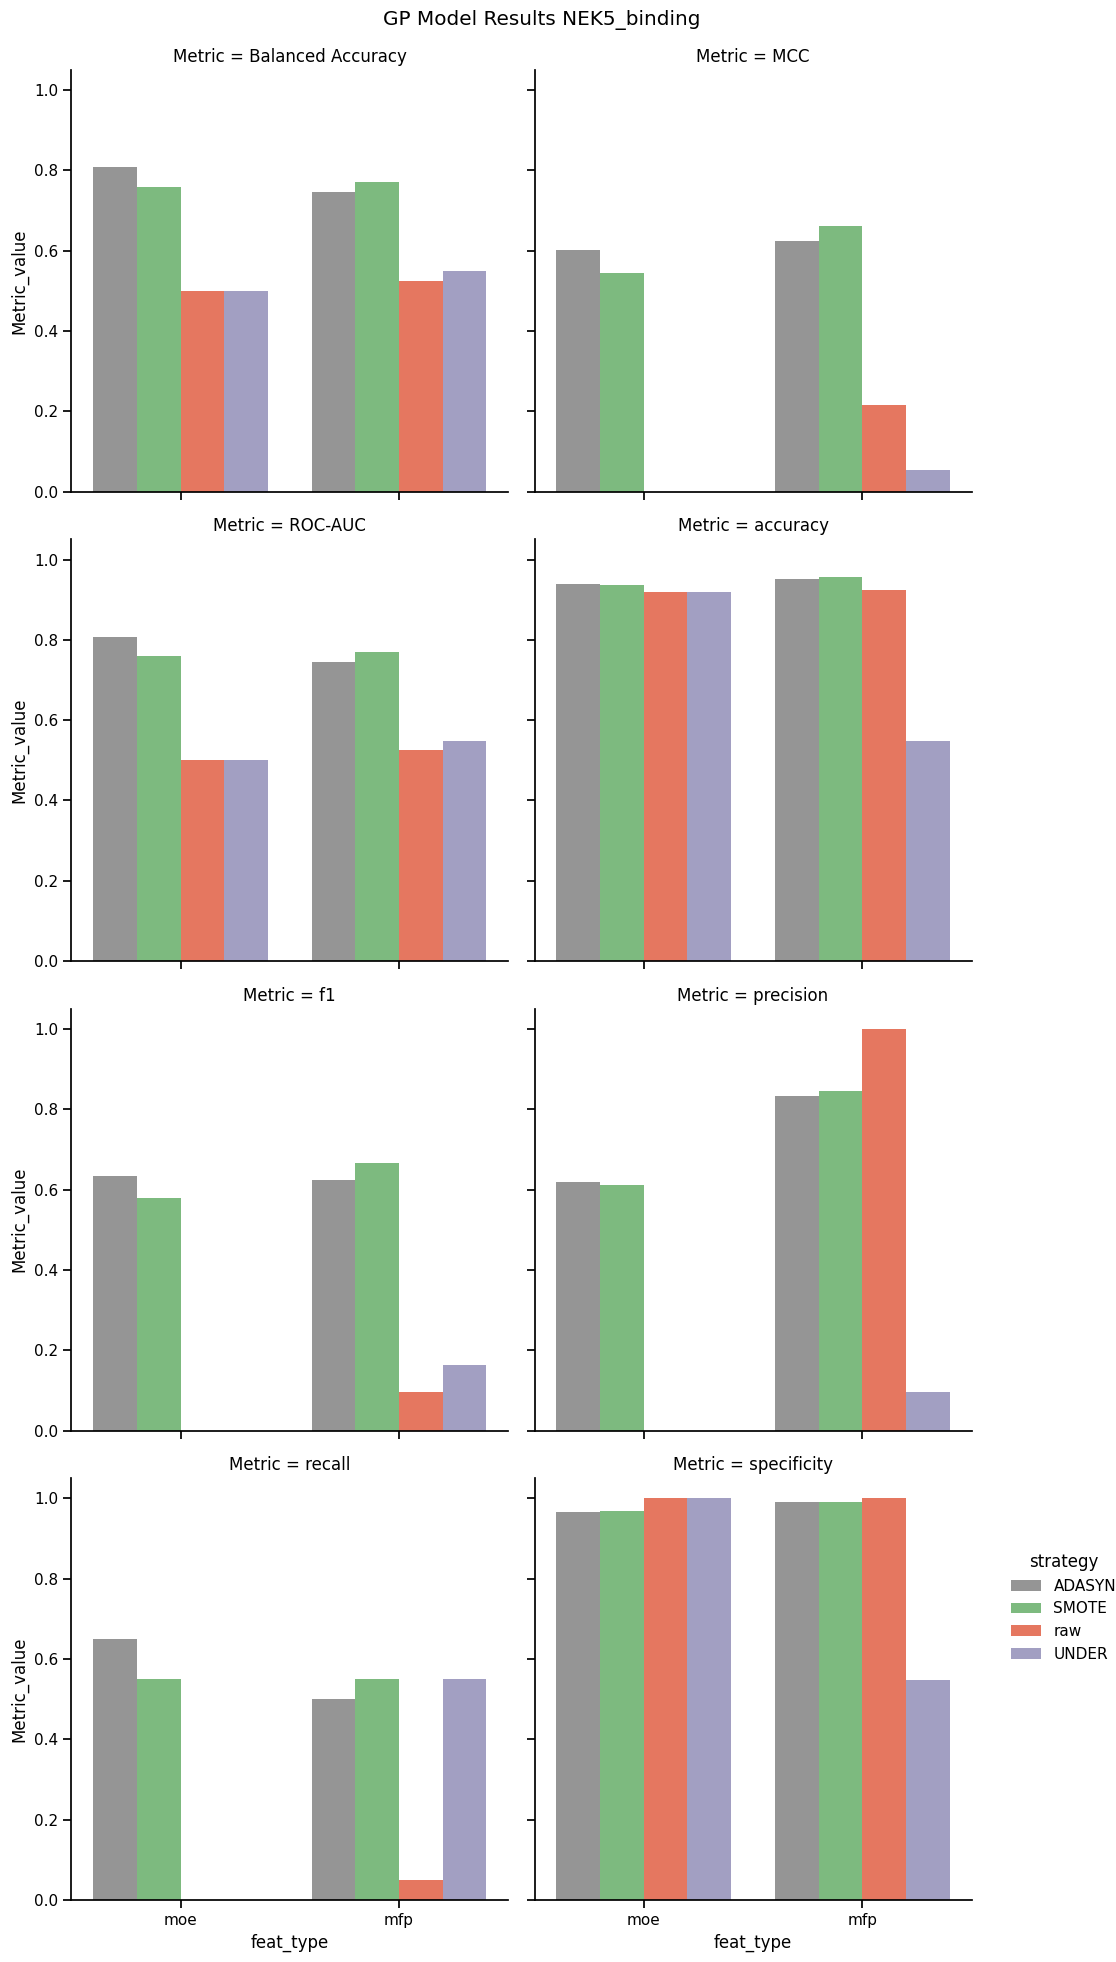


NEK9_binding


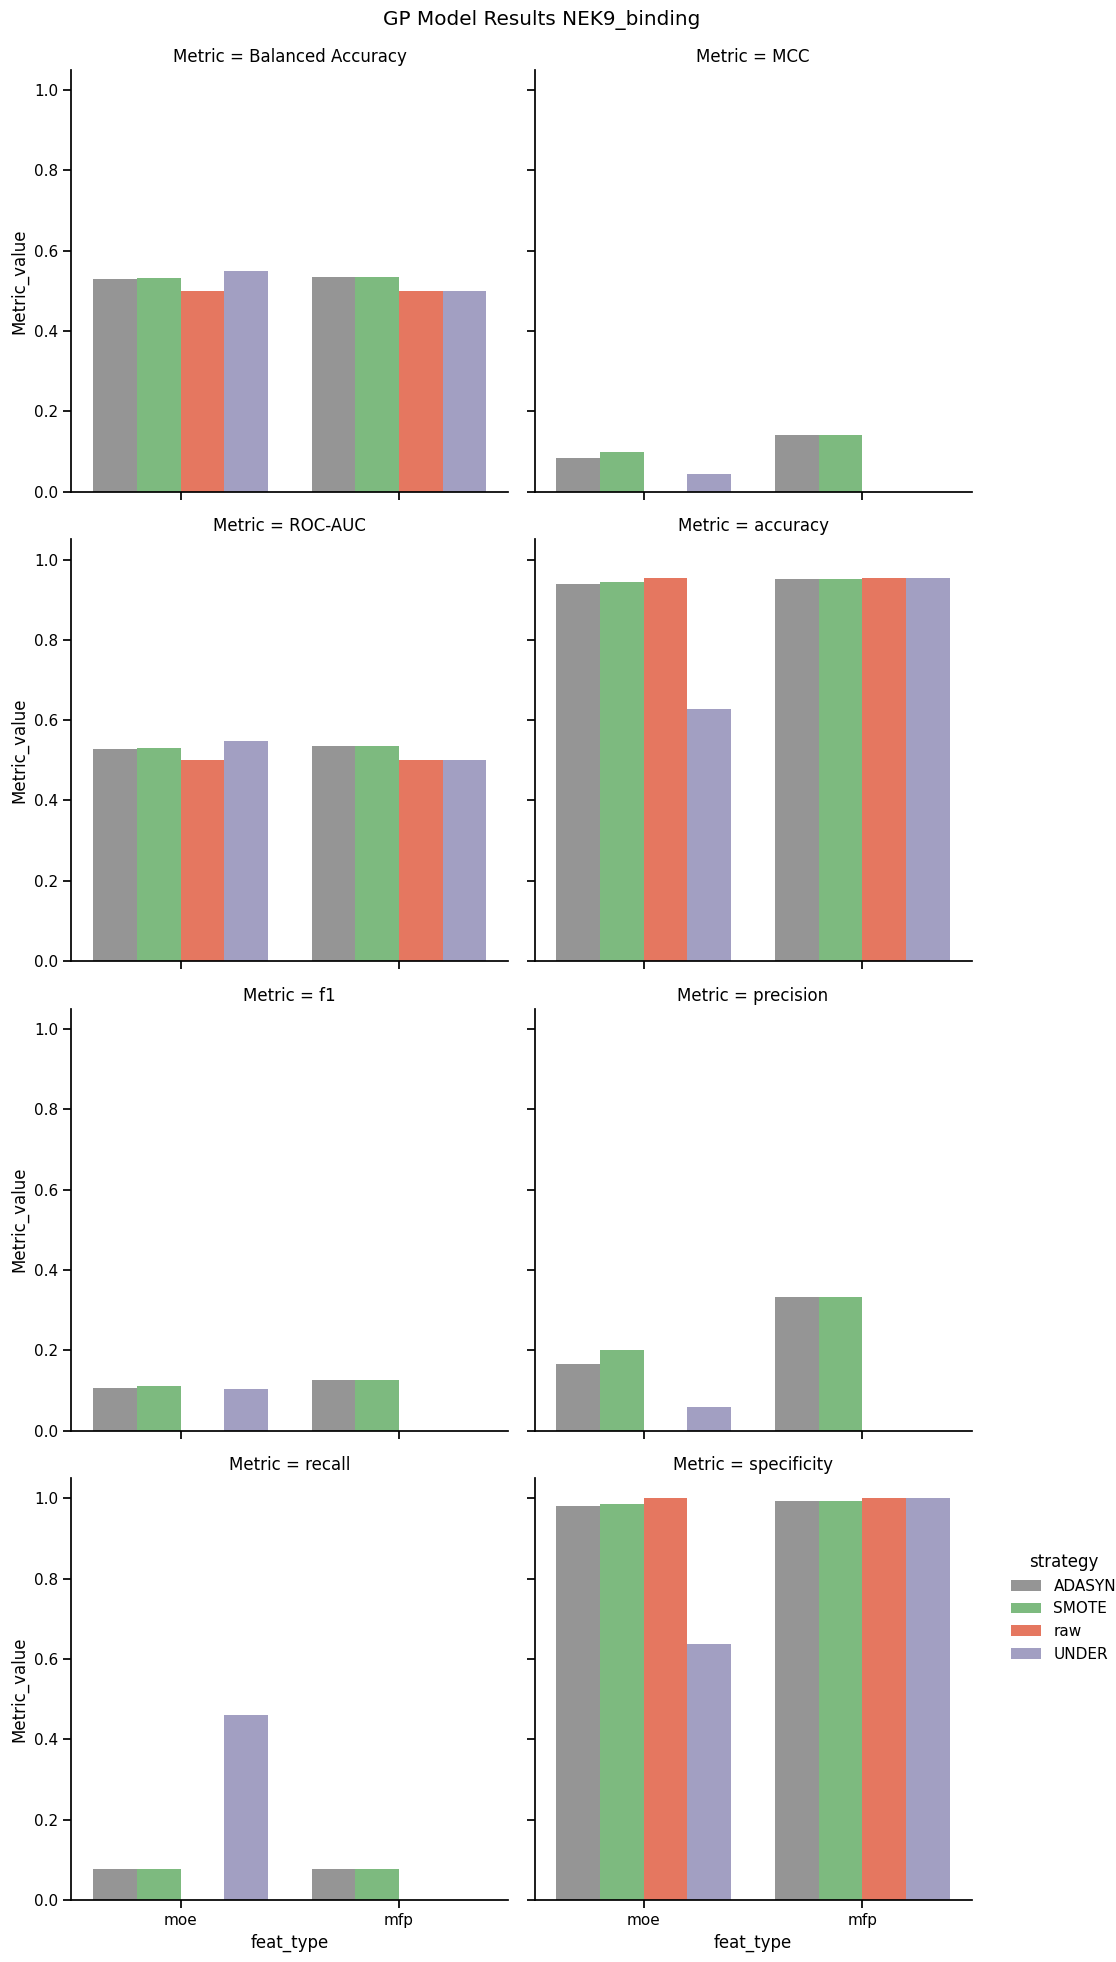


NEK9_inhibition


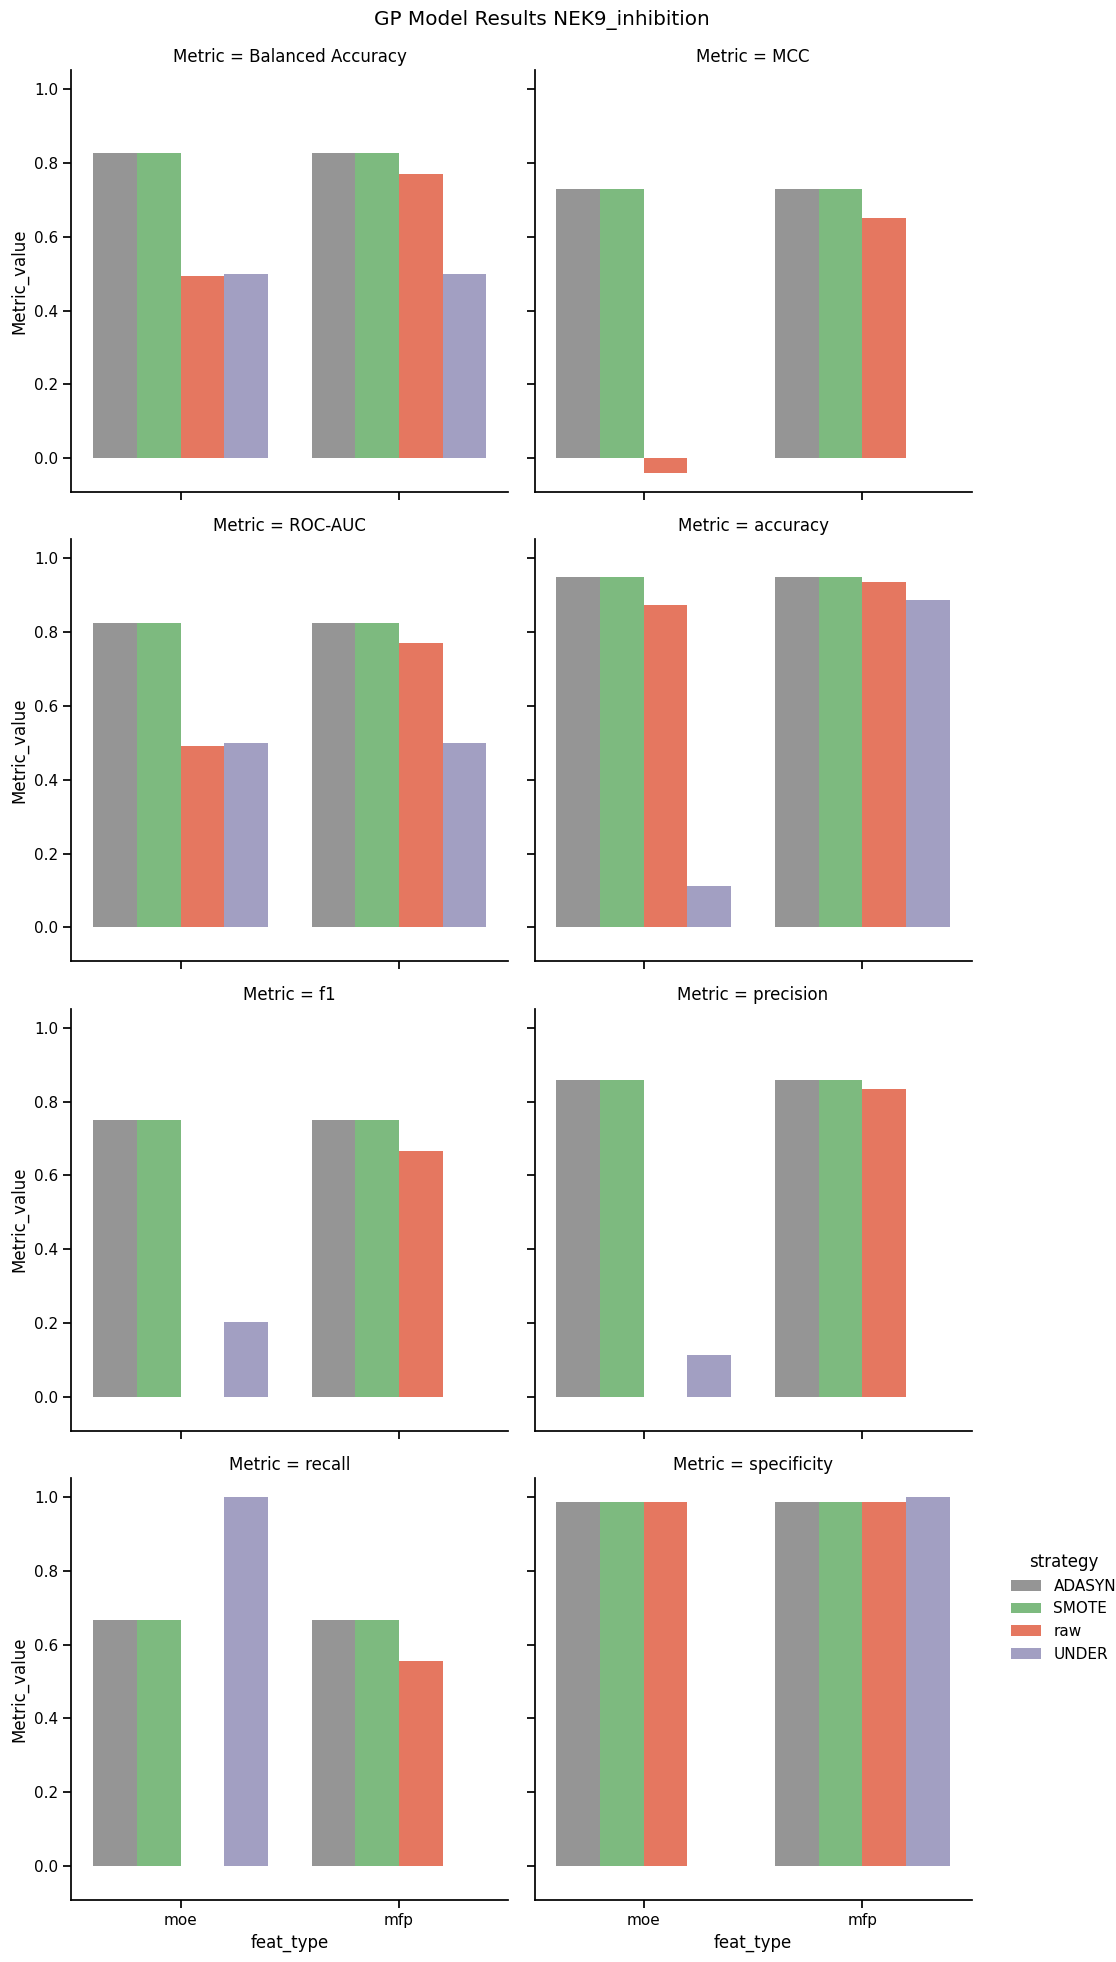

In [354]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for n, nek in enumerate(neks): 
    nek_df = test_df[test_df['NEK'] ==nek]
    print(nek)
    dflong=nek_df.melt(id_vars=['strategy', 'feat_type','model','cm'], value_vars=['accuracy','precision', 'recall','specificity', 'ROC-AUC', 'MCC', 'Balanced Accuracy','f1'],
           var_name='Metric', value_name='Metric_value')
    dflong=dflong.sort_values('Metric')
    sns.set_context('notebook')
    sns.set_palette('colorblind')
    # grid=sns.catplot(dflong, x='feat_type', y='Metric_value', hue='strategy', col='Metric', col_wrap=3, s=70, jitter=0.2)
    grid=sns.catplot(dflong, x='feat_type', y='Metric_value', hue='strategy', col='Metric',  kind='bar', col_wrap=2,palette=sampling_palette)
    sns.move_legend(grid, (.9, 0.15))
    grid.fig.subplots_adjust(top=0.95)
    
    grid.fig.suptitle(f'GP Model Results {nek}');
    plt.savefig(f"figures/GP_plots/GP_{nek}_metrics_catplot_xfeat.png")
    plt.show();
    print()
    

NEK2_binding


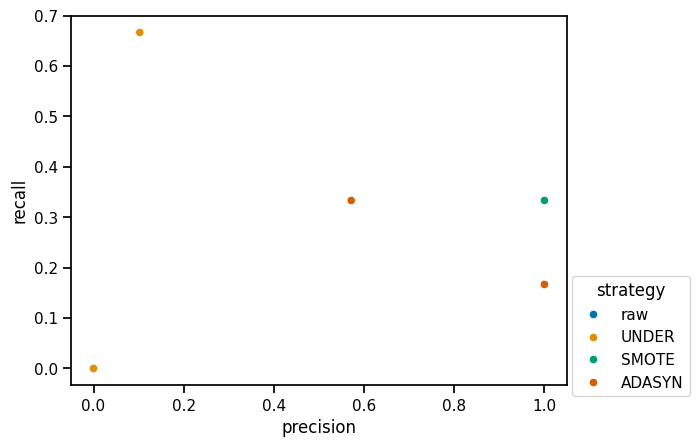


NEK2_inhibition


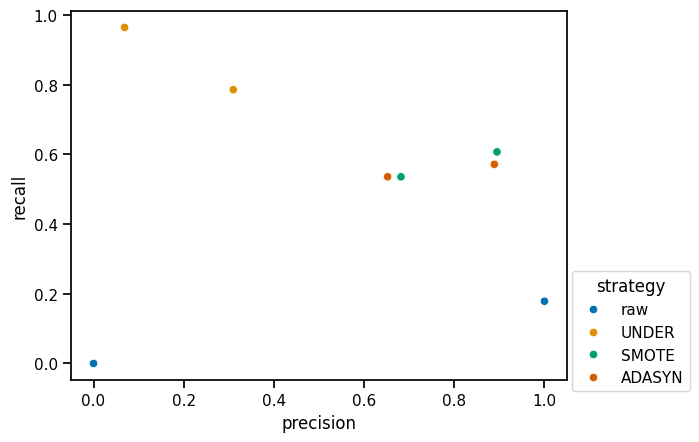


NEK3_binding


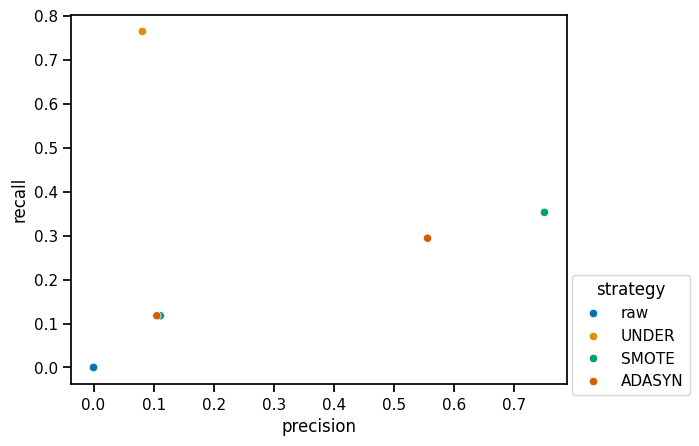


NEK5_binding


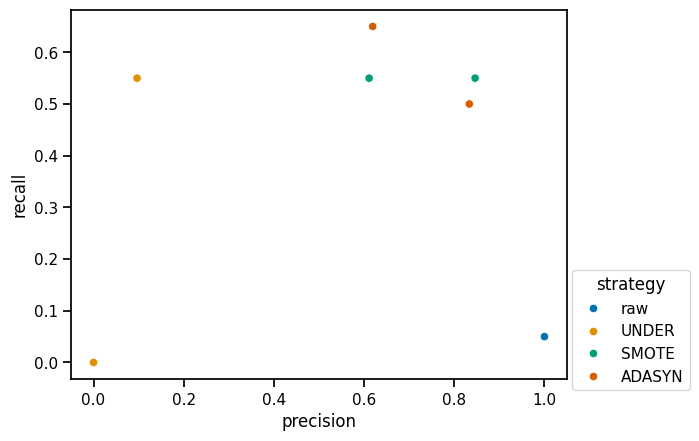


NEK9_binding


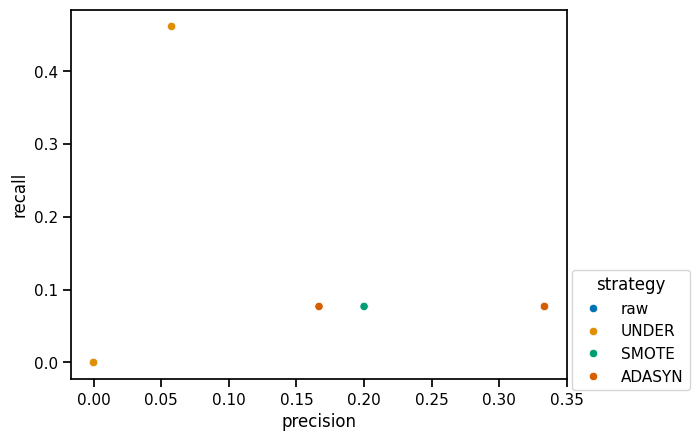


NEK9_inhibition


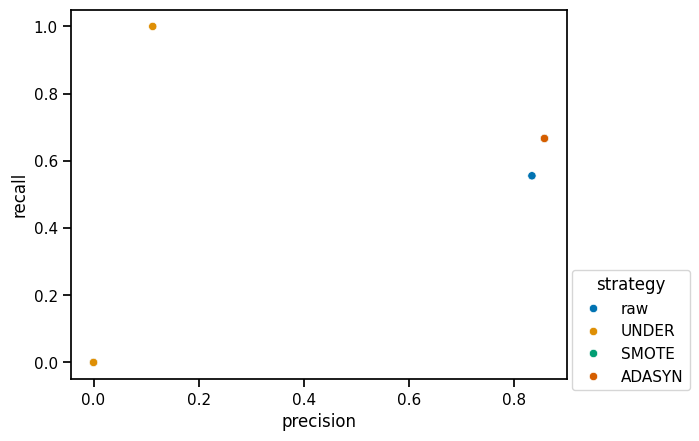

In [355]:
# g=sns.scatterplot(test_df[['strategy', 'precision', 'recall']], x='precision', y='recall', hue='strategy')
# sns.move_legend(g, (1.01, -0.03))
for n, nek in enumerate(neks): 
    nek_df = test_df[test_df['NEK'] ==nek]
    print(nek)
    g=sns.scatterplot(nek_df[['strategy', 'precision', 'recall']], x='precision', y='recall', hue='strategy')
    sns.move_legend(g, (1.01, -0.03))
        
    grid.fig.suptitle(f'GP Model Results {nek}');
    plt.show();
    print()
    

# Plot all metrics together 

In [378]:
testing2 = test_df
# type(testing2[metric_cols])
testing2.columns
metric_palette2 = sns.color_palette('RdPu',n_colors=8)
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
size_cols = ['num_samples_train','actives_train', 'active%_train', 'num_samples_test', 'actives_test',
       'active%_test', 'total_size', 'total_actives', 'total actives/total%','train actives/total%']

<Figure size 1200x1000 with 0 Axes>

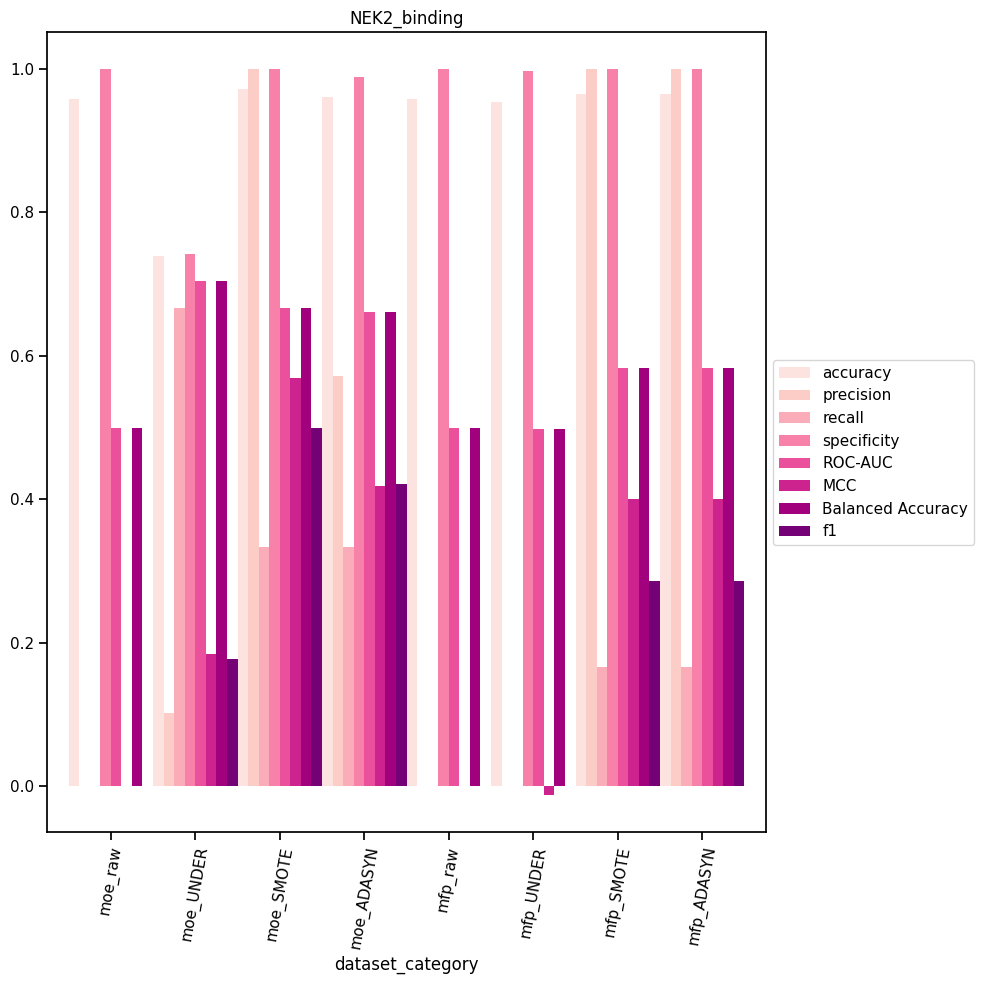

<Figure size 1200x1000 with 0 Axes>

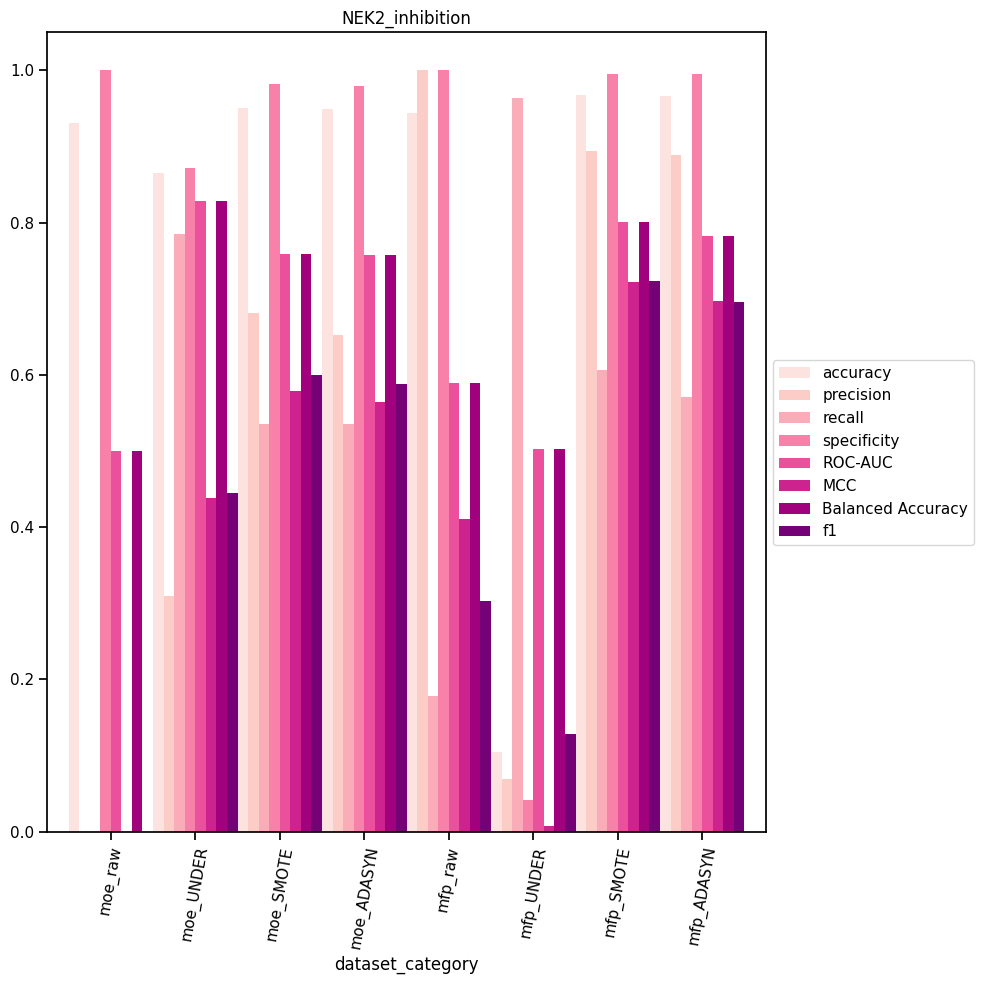

<Figure size 1200x1000 with 0 Axes>

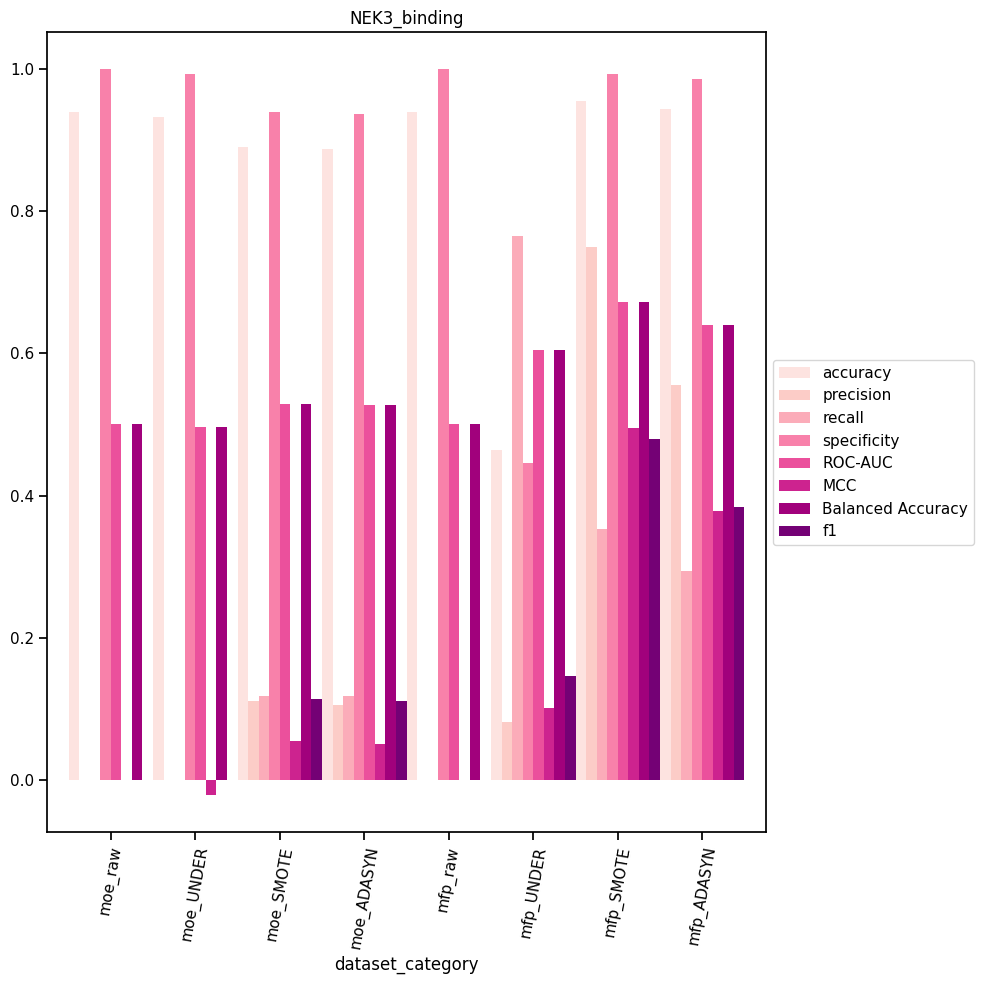

<Figure size 1200x1000 with 0 Axes>

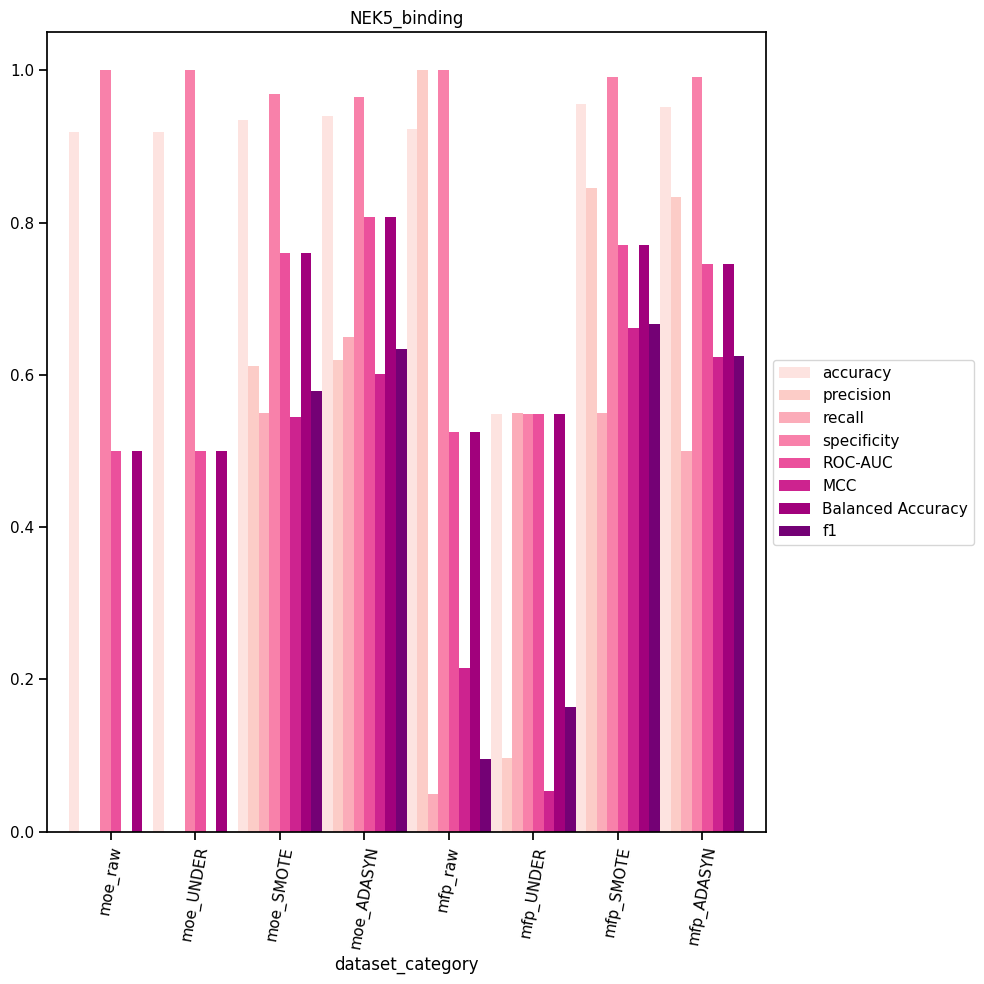

<Figure size 1200x1000 with 0 Axes>

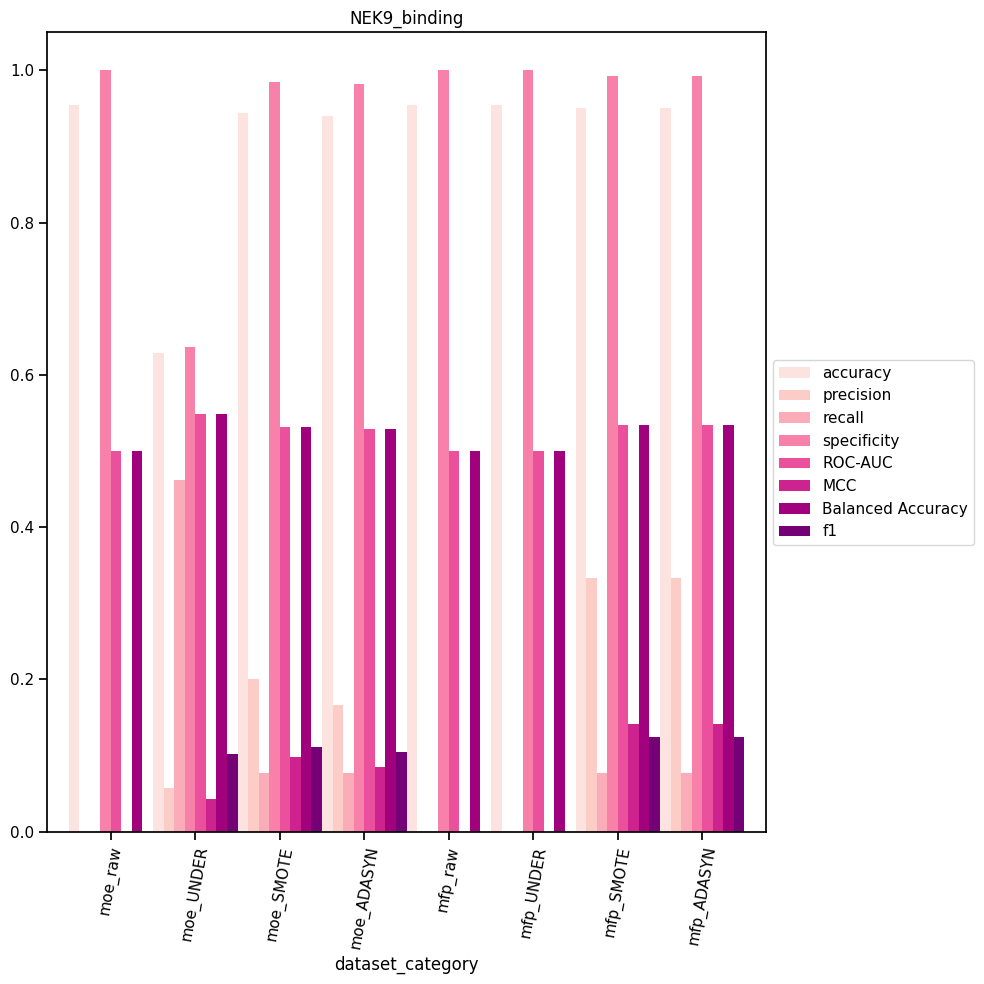

<Figure size 1200x1000 with 0 Axes>

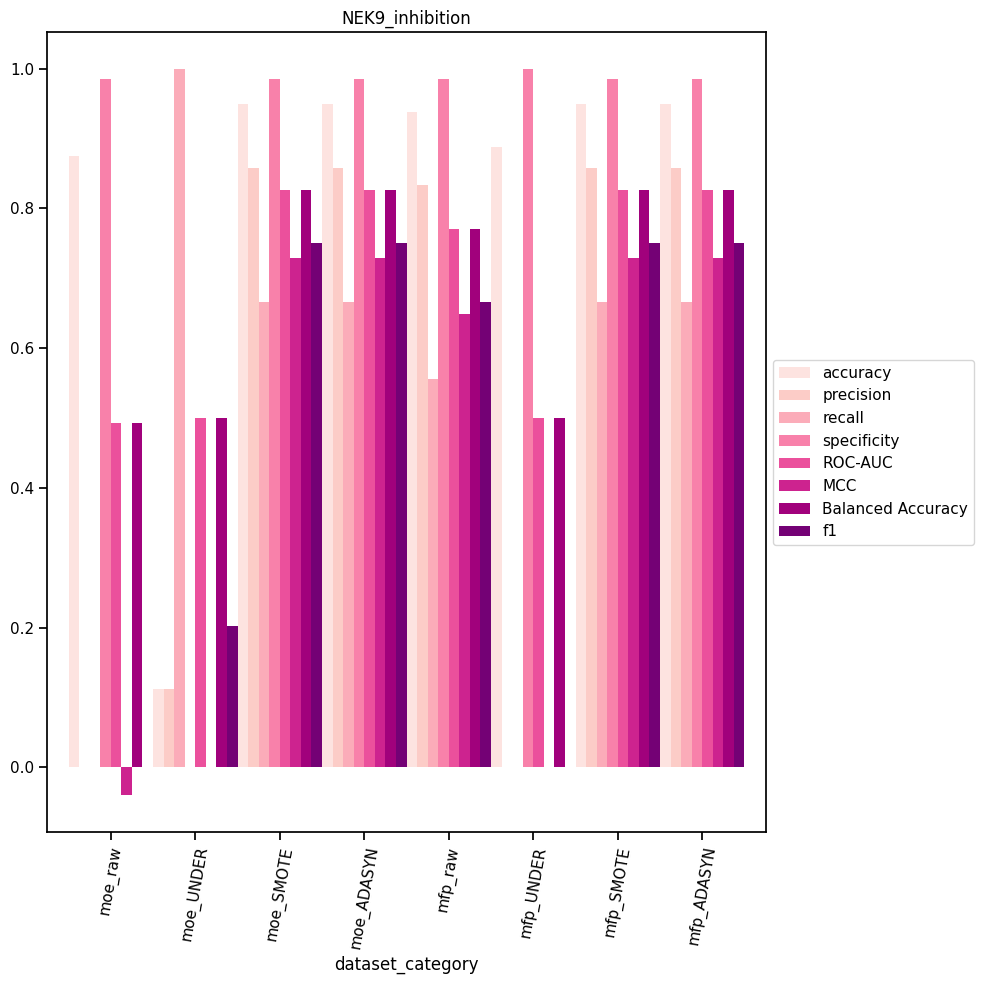

In [389]:


for n, nek in enumerate(neks): 
    df = test_df[test_df['NEK'] == nek]
    df = df[metric_cols]
    # df['model'] = df['feat_type'].astype(str)+'_'+df['strategy']
    # df.sort_values('feat_type') 
    plt.figure(figsize=(12, 10))
    ax = df.plot(x='dataset_category',kind='bar', figsize=(10,10),width=1,color=metric_palette2)
    
    # plt.ylabel('Recall Score')
    plt.title(f'{nek}')
    plt.xticks(rotation=80)  
    ax.legend(loc='upper left', bbox_to_anchor=(1,.6))
    # ax.get_legend().remove()
    plt.tight_layout()
    plt.savefig(f'figures/GP_plots/{nek}_GP_all_metrics.png')
    plt.show();
    

# Plotting above in subplots

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_85825/2208455039.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=size_cols,inplace=True)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_85825/2208455039.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=size_cols,inplace=True)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_85825/2208455039.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

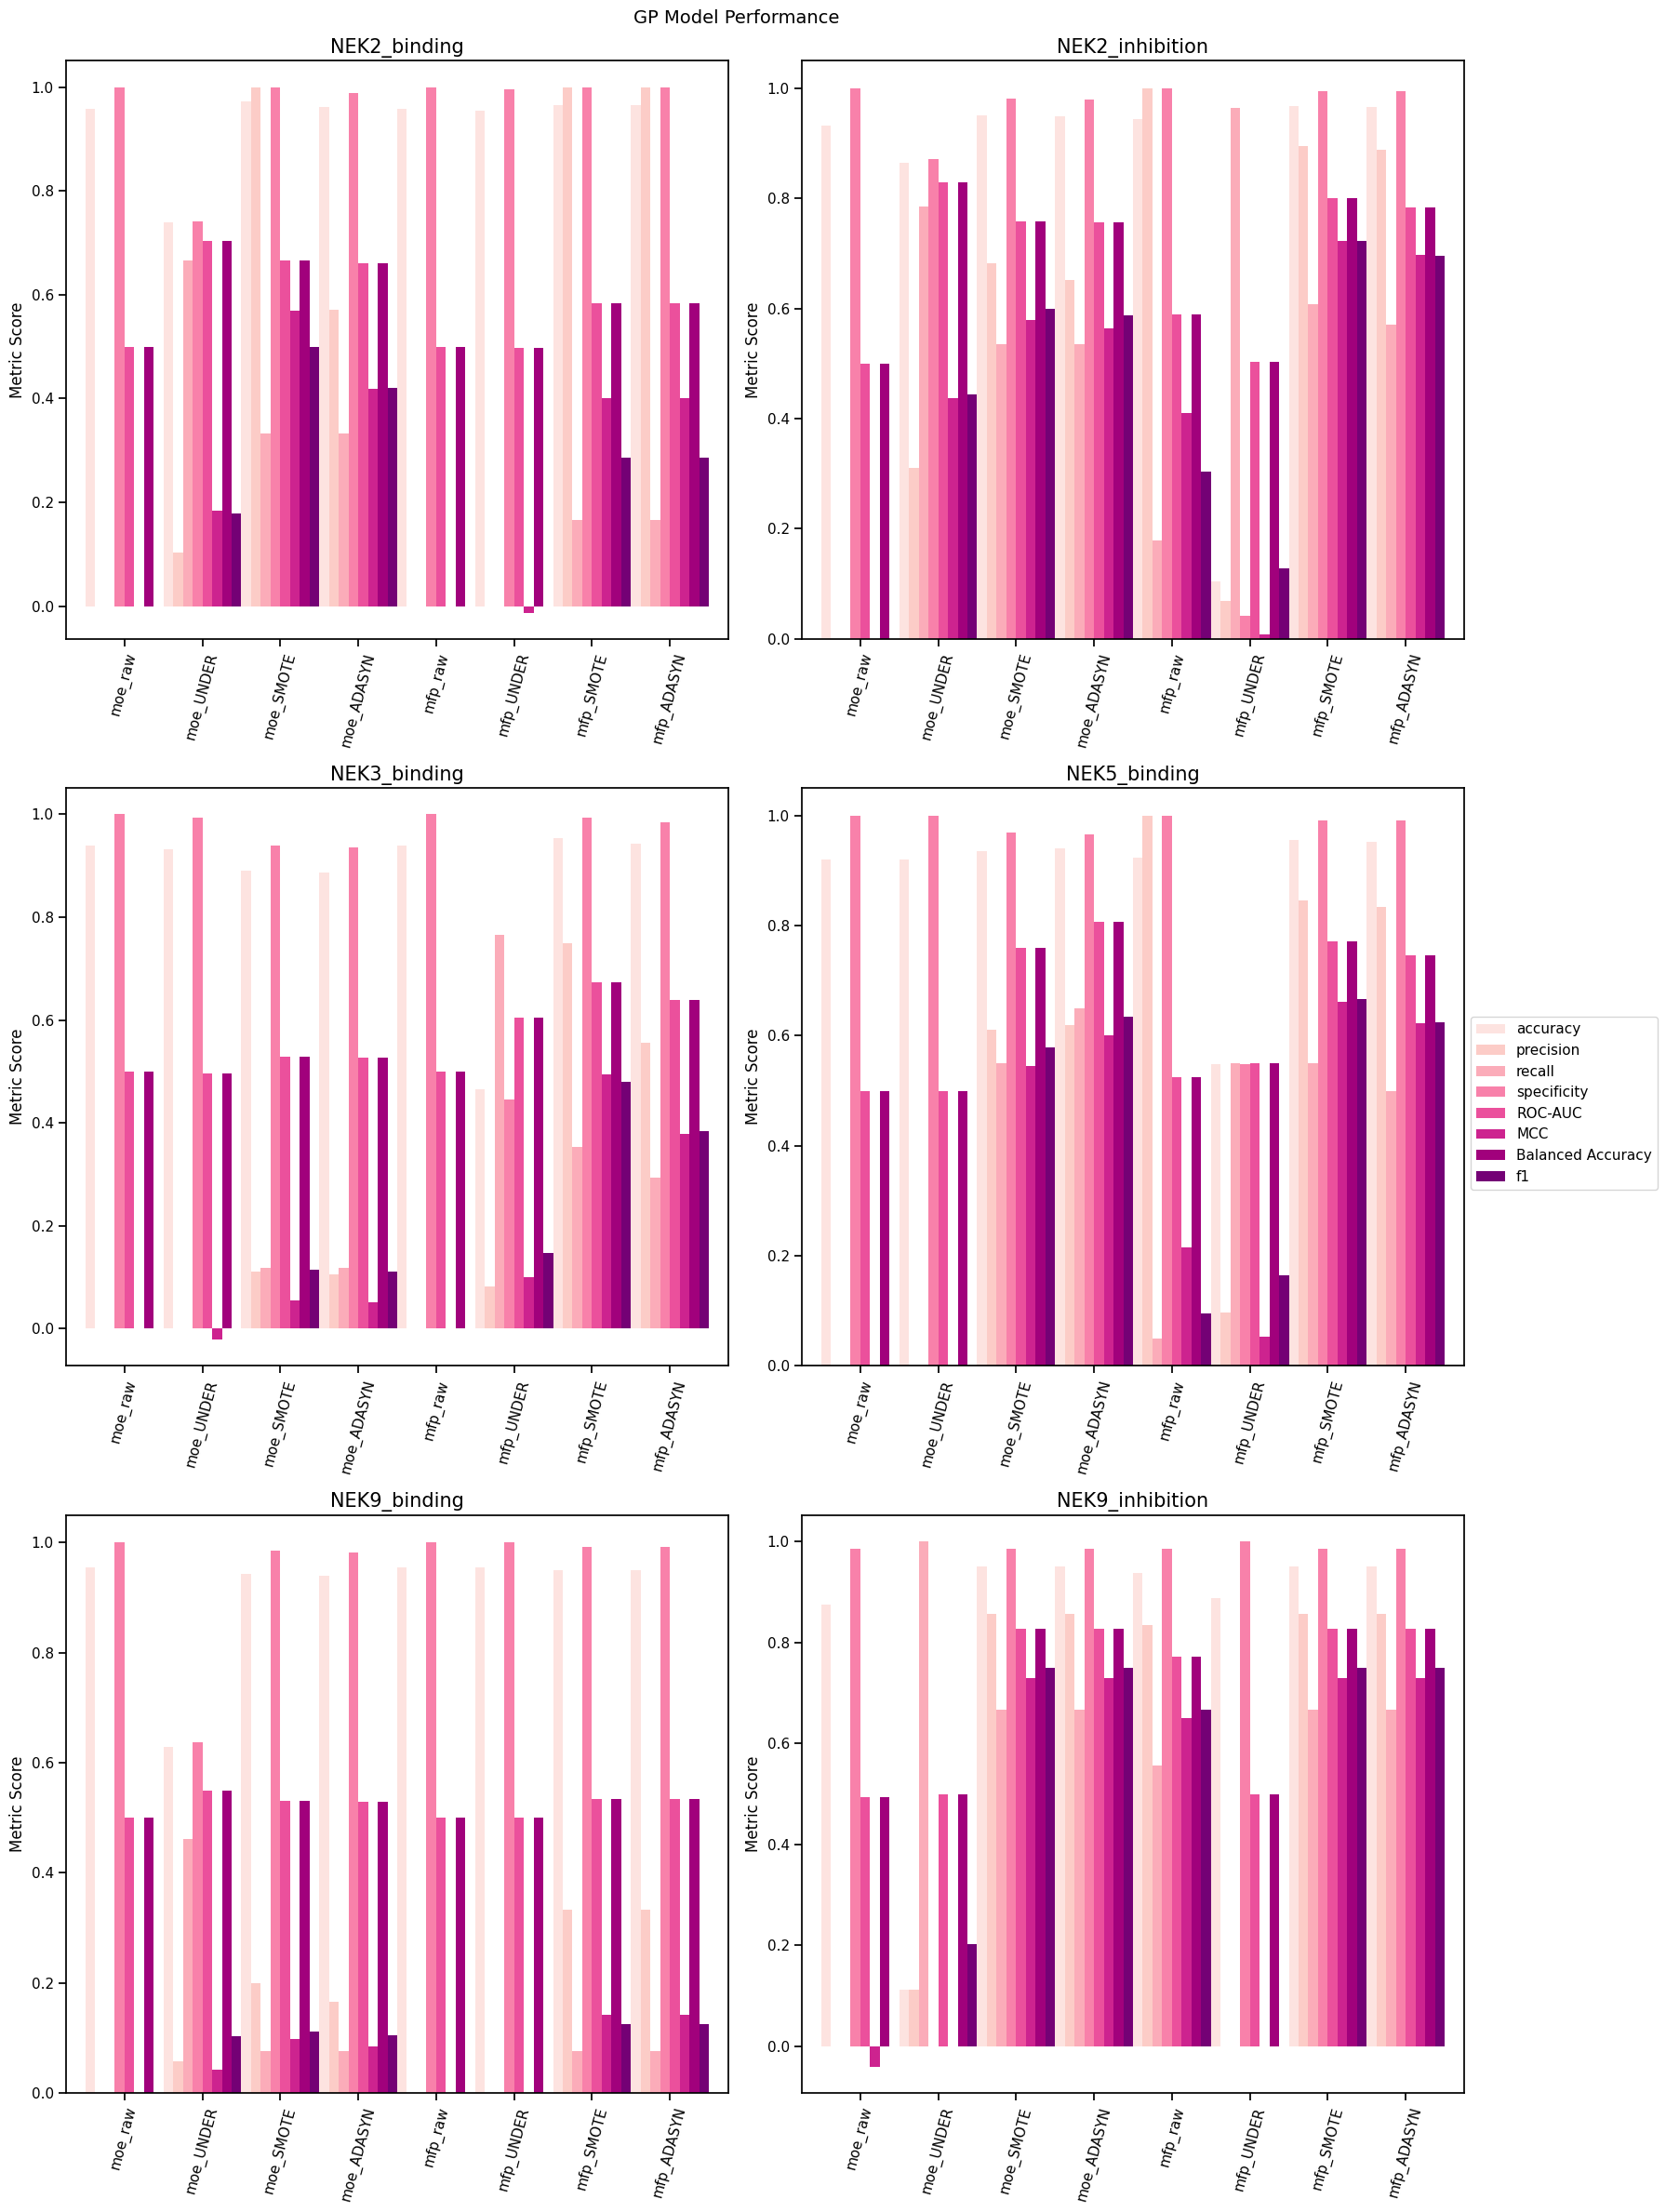

In [412]:
nek_dfs = [test_df[test_df['NEK'] == nek] for nek in neks]
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(3, 2, figsize=(16,24))
axes = axes.flatten()

for i, df in enumerate(nek_dfs):
    ax = axes[i]
    df.drop(columns=size_cols,inplace=True)
    df.plot(x='dataset_category', kind='bar', ax=ax,legend=False,color=metric_palette2,width=1)
    # ax.set_xlabel('Model')
    ax.set_ylabel('Metric Score')
    ax.set_title(f'{neks[i]}',fontsize=15)
    ax.set_xticklabels(df['dataset_category'], rotation=75) 
    ax.set_xlabel('')
handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='center', bbox_to_anchor=(1.056,.5))
# fig.legend(loc='upper left',)
fig.subplots_adjust(top=0.5)
fig.suptitle('GP Model Performance',y=.99,fontsize=14)
plt.tight_layout()
plt.savefig(f'figures/GP_plots/all_GP_model_metrics.png',bbox_inches='tight')
plt.show();


In [413]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for n, nek in enumerate(neks): 
    nek_df = test_df[test_df['NEK'] ==nek]
    print(nek)
    dflong=nek_df.melt(id_vars=['strategy', 'feat_type', 'model'], value_vars=['accuracy','precision', 'recall','specificity', 'ROC-AUC', 'MCC', 'Balanced Accuracy',],
           var_name='Metric', value_name='Metric_value')
    dflong=dflong.sort_values('Metric')
    display(dflong)
   

NEK2_binding


,strategy,feat_type,model,Metric,Metric_value
55,ADASYN,mfp,NEK2_binding_mfp_ADASYN_GP,Balanced Accuracy,0.583333
48,raw,moe,NEK2_binding_moe_raw_GP,Balanced Accuracy,0.500000
49,UNDER,moe,NEK2_binding_moe_UNDER_GP,Balanced Accuracy,0.704182
50,SMOTE,moe,NEK2_binding_moe_SMOTE_GP,Balanced Accuracy,0.666667
54,SMOTE,mfp,NEK2_binding_mfp_SMOTE_GP,Balanced Accuracy,0.583333
52,raw,mfp,NEK2_binding_mfp_raw_GP,Balanced Accuracy,0.500000
53,UNDER,mfp,NEK2_binding_mfp_UNDER_GP,Balanced Accuracy,0.498155
51,ADASYN,moe,NEK2_binding_moe_ADASYN_GP,Balanced Accuracy,0.661132
41,UNDER,moe,NEK2_binding_moe_UNDER_GP,MCC,0.184161
42,SMOTE,moe,NEK2_binding_moe_SMOTE_GP,MCC,0.569013


NEK2_inhibition


,strategy,feat_type,model,Metric,Metric_value
55,ADASYN,mfp,NEK2_inhibition_mfp_ADASYN_GP,Balanced Accuracy,0.783090
48,raw,moe,NEK2_inhibition_moe_raw_GP,Balanced Accuracy,0.500000
49,UNDER,moe,NEK2_inhibition_moe_UNDER_GP,Balanced Accuracy,0.828553
50,SMOTE,moe,NEK2_inhibition_moe_SMOTE_GP,Balanced Accuracy,0.758671
54,SMOTE,mfp,NEK2_inhibition_mfp_SMOTE_GP,Balanced Accuracy,0.800947
52,raw,mfp,NEK2_inhibition_mfp_raw_GP,Balanced Accuracy,0.589286
53,UNDER,mfp,NEK2_inhibition_mfp_UNDER_GP,Balanced Accuracy,0.503140
51,ADASYN,moe,NEK2_inhibition_moe_ADASYN_GP,Balanced Accuracy,0.757358
41,UNDER,moe,NEK2_inhibition_moe_UNDER_GP,MCC,0.438116
42,SMOTE,moe,NEK2_inhibition_moe_SMOTE_GP,MCC,0.579098


NEK3_binding


,strategy,feat_type,model,Metric,Metric_value
55,ADASYN,mfp,NEK3_binding_mfp_ADASYN_GP,Balanced Accuracy,0.639512
48,raw,moe,NEK3_binding_moe_raw_GP,Balanced Accuracy,0.500000
49,UNDER,moe,NEK3_binding_moe_UNDER_GP,Balanced Accuracy,0.496226
50,SMOTE,moe,NEK3_binding_moe_SMOTE_GP,Balanced Accuracy,0.528635
54,SMOTE,mfp,NEK3_binding_mfp_SMOTE_GP,Balanced Accuracy,0.672697
52,raw,mfp,NEK3_binding_mfp_raw_GP,Balanced Accuracy,0.500000
53,UNDER,mfp,NEK3_binding_mfp_UNDER_GP,Balanced Accuracy,0.604994
51,ADASYN,moe,NEK3_binding_moe_ADASYN_GP,Balanced Accuracy,0.526748
41,UNDER,moe,NEK3_binding_moe_UNDER_GP,MCC,-0.021406
42,SMOTE,moe,NEK3_binding_moe_SMOTE_GP,MCC,0.055761


NEK5_binding


,strategy,feat_type,model,Metric,Metric_value
55,ADASYN,mfp,NEK5_binding_mfp_ADASYN_GP,Balanced Accuracy,0.745614
48,raw,moe,NEK5_binding_moe_raw_GP,Balanced Accuracy,0.500000
49,UNDER,moe,NEK5_binding_moe_UNDER_GP,Balanced Accuracy,0.500000
50,SMOTE,moe,NEK5_binding_moe_SMOTE_GP,Balanced Accuracy,0.759649
54,SMOTE,mfp,NEK5_binding_mfp_SMOTE_GP,Balanced Accuracy,0.770614
52,raw,mfp,NEK5_binding_mfp_raw_GP,Balanced Accuracy,0.525000
53,UNDER,mfp,NEK5_binding_mfp_UNDER_GP,Balanced Accuracy,0.549123
51,ADASYN,moe,NEK5_binding_moe_ADASYN_GP,Balanced Accuracy,0.807456
41,UNDER,moe,NEK5_binding_moe_UNDER_GP,MCC,0.000000
42,SMOTE,moe,NEK5_binding_moe_SMOTE_GP,MCC,0.545003


NEK9_binding


,strategy,feat_type,model,Metric,Metric_value
55,ADASYN,mfp,NEK9_binding_mfp_ADASYN_GP,Balanced Accuracy,0.534758
48,raw,moe,NEK9_binding_moe_raw_GP,Balanced Accuracy,0.500000
49,UNDER,moe,NEK9_binding_moe_UNDER_GP,Balanced Accuracy,0.549288
50,SMOTE,moe,NEK9_binding_moe_SMOTE_GP,Balanced Accuracy,0.531054
54,SMOTE,mfp,NEK9_binding_mfp_SMOTE_GP,Balanced Accuracy,0.534758
52,raw,mfp,NEK9_binding_mfp_raw_GP,Balanced Accuracy,0.500000
53,UNDER,mfp,NEK9_binding_mfp_UNDER_GP,Balanced Accuracy,0.500000
51,ADASYN,moe,NEK9_binding_moe_ADASYN_GP,Balanced Accuracy,0.529202
41,UNDER,moe,NEK9_binding_moe_UNDER_GP,MCC,0.042804
42,SMOTE,moe,NEK9_binding_moe_SMOTE_GP,MCC,0.098695


NEK9_inhibition


,strategy,feat_type,model,Metric,Metric_value
55,ADASYN,mfp,NEK9_inhibition_mfp_ADASYN_GP,Balanced Accuracy,0.826291
48,raw,moe,NEK9_inhibition_moe_raw_GP,Balanced Accuracy,0.492958
49,UNDER,moe,NEK9_inhibition_moe_UNDER_GP,Balanced Accuracy,0.500000
50,SMOTE,moe,NEK9_inhibition_moe_SMOTE_GP,Balanced Accuracy,0.826291
54,SMOTE,mfp,NEK9_inhibition_mfp_SMOTE_GP,Balanced Accuracy,0.826291
52,raw,mfp,NEK9_inhibition_mfp_raw_GP,Balanced Accuracy,0.770736
53,UNDER,mfp,NEK9_inhibition_mfp_UNDER_GP,Balanced Accuracy,0.500000
51,ADASYN,moe,NEK9_inhibition_moe_ADASYN_GP,Balanced Accuracy,0.826291
41,UNDER,moe,NEK9_inhibition_moe_UNDER_GP,MCC,0.000000
42,SMOTE,moe,NEK9_inhibition_moe_SMOTE_GP,MCC,0.729752


# Selecting best strategy/feat for metrics 

In [414]:
def select_winner(df, compare_type): 
    metrics = ['accuracy',	'precision',	'recall',	'specificity',	'ROC-AUC',	'MCC',	'Balanced Accuracy' ,'f1'] 
    df_result = pd.DataFrame(columns=metrics)
    results=[]
    for compare in df[compare_type].unique():
        compare_df = df[df[compare_type] == compare]
        
        best_feat_types = {'compare': compare}

        for met in metrics:
            best_feat_type = compare_df.loc[compare_df[met].idxmax()]
            best_feat_types[met] = best_feat_type[met]
            best_feat_types['feat_type'] = best_feat_type['feat_type']
            best_feat_types['model'] = best_feat_type['model']
            best_feat_types['strategy'] = best_feat_type['strategy']
            best_feat_types['NEK'] = best_feat_type['NEK']

        results.append(best_feat_types)

    final_results = pd.DataFrame(results)
    return final_results
    

In [415]:
testdf = nek_df = test_df[test_df['NEK'] =='NEK2_binding']
ranked_nek2 = select_winner(testdf, 'strategy')
ranked_nek2

,compare,accuracy,feat_type,model,strategy,NEK,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1
0,raw,0.957597,moe,NEK2_binding_moe_raw_GP,raw,NEK2_binding,0.000000,0.000000,1.00000,0.500000,0.000000,0.500000,0.000000
1,UNDER,0.954064,moe,NEK2_binding_moe_UNDER_GP,UNDER,NEK2_binding,0.102564,0.666667,0.99631,0.704182,0.184161,0.704182,0.177778
2,SMOTE,0.971731,moe,NEK2_binding_moe_SMOTE_GP,SMOTE,NEK2_binding,1.000000,0.333333,1.00000,0.666667,0.569013,0.666667,0.500000
3,ADASYN,0.964664,moe,NEK2_binding_moe_ADASYN_GP,ADASYN,NEK2_binding,1.000000,0.333333,1.00000,0.661132,0.418102,0.661132,0.421053


# For each metric print moe or mfp if that metric had a better score 

In [416]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for n, nek in enumerate(neks): 
    nek_df = test_df[test_df['NEK'] ==nek]
    # print(nek)
    metrics = ['accuracy',	'precision',	'recall',	'specificity',	'ROC-AUC',	'MCC',	'Balanced Accuracy' ,'f1'] 
    df_result = pd.DataFrame(columns=metrics)
    results=[]
    # for met in metrics:

    #     metric_acc = nek_df.groupby('feat_type')[met].max().idxmax()
    #     df_result.loc[0, met] = metric_acc
        
    # df_result['NEK'] = nek
    # results.append(df_result)
    results = []
    
    for nek in neks:
        nek_df = test_df[test_df['NEK'] == nek]
        
        
        for strategy in nek_df['strategy'].unique():
            strat_df = nek_df[nek_df['strategy'] == strategy]
            model = nek_df['model'] 
            # display(strat_df)
            best_feat_types = {}
    
            for met in metrics:
                best_feat_type = strat_df.groupby('feat_type')[met].max().idxmax()
                best_feat_types[met] = best_feat_type
    
            best_feat_types['NEK'] = nek
            best_feat_types['strategy'] = strategy
            best_feat_types['model'] = 'GP'
            results.append(best_feat_types)

    final_results = pd.DataFrame(results)
    display(final_results)
    # print()
        
        

,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,NEK,strategy,model
0,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_binding,raw,GP
1,mfp,moe,moe,mfp,moe,moe,moe,moe,NEK2_binding,UNDER,GP
2,moe,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,SMOTE,GP
3,mfp,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,ADASYN,GP
4,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,raw,GP
5,moe,moe,mfp,moe,moe,moe,moe,moe,NEK2_inhibition,UNDER,GP
6,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,SMOTE,GP
7,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,ADASYN,GP
8,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK3_binding,raw,GP
9,moe,mfp,mfp,moe,mfp,mfp,mfp,mfp,NEK3_binding,UNDER,GP


,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,NEK,strategy,model
0,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_binding,raw,GP
1,mfp,moe,moe,mfp,moe,moe,moe,moe,NEK2_binding,UNDER,GP
2,moe,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,SMOTE,GP
3,mfp,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,ADASYN,GP
4,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,raw,GP
5,moe,moe,mfp,moe,moe,moe,moe,moe,NEK2_inhibition,UNDER,GP
6,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,SMOTE,GP
7,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,ADASYN,GP
8,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK3_binding,raw,GP
9,moe,mfp,mfp,moe,mfp,mfp,mfp,mfp,NEK3_binding,UNDER,GP


,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,NEK,strategy,model
0,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_binding,raw,GP
1,mfp,moe,moe,mfp,moe,moe,moe,moe,NEK2_binding,UNDER,GP
2,moe,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,SMOTE,GP
3,mfp,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,ADASYN,GP
4,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,raw,GP
5,moe,moe,mfp,moe,moe,moe,moe,moe,NEK2_inhibition,UNDER,GP
6,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,SMOTE,GP
7,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,ADASYN,GP
8,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK3_binding,raw,GP
9,moe,mfp,mfp,moe,mfp,mfp,mfp,mfp,NEK3_binding,UNDER,GP


,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,NEK,strategy,model
0,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_binding,raw,GP
1,mfp,moe,moe,mfp,moe,moe,moe,moe,NEK2_binding,UNDER,GP
2,moe,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,SMOTE,GP
3,mfp,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,ADASYN,GP
4,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,raw,GP
5,moe,moe,mfp,moe,moe,moe,moe,moe,NEK2_inhibition,UNDER,GP
6,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,SMOTE,GP
7,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,ADASYN,GP
8,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK3_binding,raw,GP
9,moe,mfp,mfp,moe,mfp,mfp,mfp,mfp,NEK3_binding,UNDER,GP


,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,NEK,strategy,model
0,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_binding,raw,GP
1,mfp,moe,moe,mfp,moe,moe,moe,moe,NEK2_binding,UNDER,GP
2,moe,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,SMOTE,GP
3,mfp,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,ADASYN,GP
4,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,raw,GP
5,moe,moe,mfp,moe,moe,moe,moe,moe,NEK2_inhibition,UNDER,GP
6,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,SMOTE,GP
7,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,ADASYN,GP
8,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK3_binding,raw,GP
9,moe,mfp,mfp,moe,mfp,mfp,mfp,mfp,NEK3_binding,UNDER,GP


,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,NEK,strategy,model
0,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_binding,raw,GP
1,mfp,moe,moe,mfp,moe,moe,moe,moe,NEK2_binding,UNDER,GP
2,moe,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,SMOTE,GP
3,mfp,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,ADASYN,GP
4,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,raw,GP
5,moe,moe,mfp,moe,moe,moe,moe,moe,NEK2_inhibition,UNDER,GP
6,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,SMOTE,GP
7,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,ADASYN,GP
8,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK3_binding,raw,GP
9,moe,mfp,mfp,moe,mfp,mfp,mfp,mfp,NEK3_binding,UNDER,GP


# adding a new column with strategy_feat

In [421]:
plot_df = test_df.copy()
# plot_df['dataset'] = plot_df['strategy'].str.cat(plot_df['feat_type'],sep='_')
test_df

,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,cm,NEK,...,num_samples_train,actives_train,active%_train,num_samples_test,actives_test,active%_test,total_size,total_actives,total actives/total%,train actives/total%
0,0.957597,0.000000,0.000000,1.000000,0.500000,0.000000,0.500000,0.000000,"[271, 0, 12, 0]",NEK2_binding,...,1125.0,45.0,4.000000,283.0,12.0,4.240283,1408.0,57.0,4.048295,3.196023
1,0.738516,0.102564,0.666667,0.741697,0.704182,0.184161,0.704182,0.177778,"[201, 70, 4, 8]",NEK2_binding,...,90.0,45.0,50.000000,283.0,12.0,4.240283,373.0,57.0,15.281501,12.064343
2,0.971731,1.000000,0.333333,1.000000,0.666667,0.569013,0.666667,0.500000,"[271, 0, 8, 4]",NEK2_binding,...,2160.0,1080.0,50.000000,283.0,12.0,4.240283,2443.0,1092.0,44.699140,44.207941
3,0.961131,0.571429,0.333333,0.988930,0.661132,0.418102,0.661132,0.421053,"[268, 3, 8, 4]",NEK2_binding,...,2158.0,1078.0,49.953661,283.0,12.0,4.240283,2441.0,1090.0,44.653830,44.162229
4,0.957597,0.000000,0.000000,1.000000,0.500000,0.000000,0.500000,0.000000,"[271, 0, 12, 0]",NEK2_binding,...,1125.0,45.0,4.000000,283.0,12.0,4.240283,1408.0,57.0,4.048295,3.196023
5,0.954064,0.000000,0.000000,0.996310,0.498155,-0.012531,0.498155,0.000000,"[270, 1, 12, 0]",NEK2_binding,...,90.0,45.0,50.000000,283.0,12.0,4.240283,373.0,57.0,15.281501,12.064343
6,0.964664,1.000000,0.166667,1.000000,0.583333,0.400918,0.583333,0.285714,"[271, 0, 10, 2]",NEK2_binding,...,2160.0,1080.0,50.000000,283.0,12.0,4.240283,2443.0,1092.0,44.699140,44.207941
7,0.964664,1.000000,0.166667,1.000000,0.583333,0.400918,0.583333,0.285714,"[271, 0, 10, 2]",NEK2_binding,...,2158.0,1078.0,49.953661,283.0,12.0,4.240283,2441.0,1090.0,44.653830,44.162229
8,0.931540,0.000000,0.000000,1.000000,0.500000,0.000000,0.500000,0.000000,"[381, 0, 28, 0]",NEK2_inhibition,...,1635.0,112.0,6.850153,409.0,28.0,6.845966,2044.0,140.0,6.849315,5.479452
9,0.865526,0.309859,0.785714,0.871391,0.828553,0.438116,0.828553,0.444444,"[332, 49, 6, 22]",NEK2_inhibition,...,224.0,112.0,50.000000,409.0,28.0,6.845966,633.0,140.0,22.116904,17.693523


# sub plots for each metric 

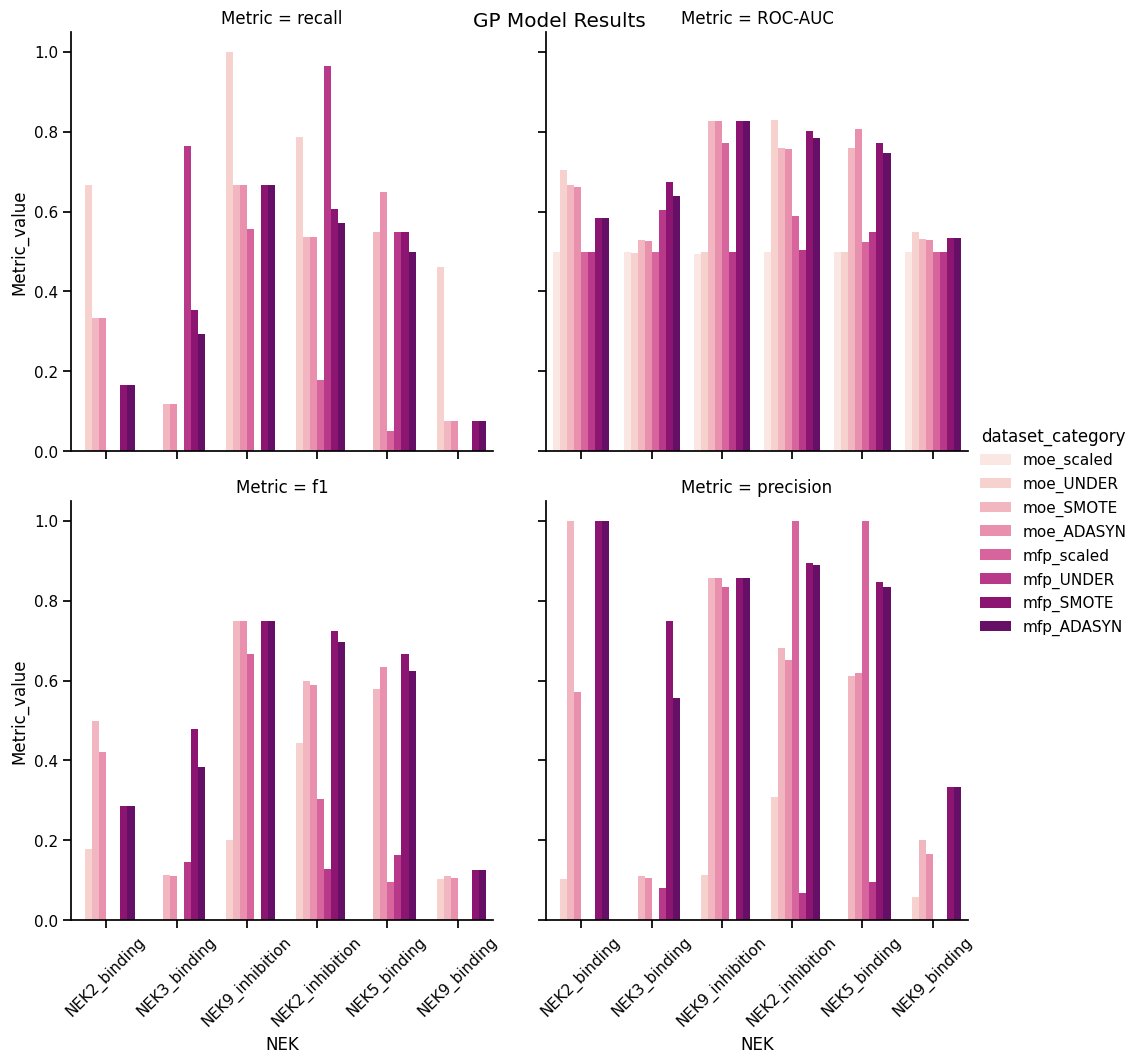

In [418]:
dflong=plot_df.melt(id_vars=['NEK', 'dataset_category', 'model'], value_vars=['recall', 'f1', 'ROC-AUC', 'precision'],
           var_name='Metric', value_name='Metric_value')
dflong=dflong.sort_values('dataset_category', ascending=False)
# display(dflong)

sns.set_context('notebook')
sns.set_palette('colorblind')
# grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=3, s=70, jitter=0.2)
grid=sns.catplot(dflong, x='NEK', y='Metric_value', hue='dataset_category', col='Metric',  kind='bar', col_wrap=2,palette=metric_palette2)
# plt.ylabel('Recall Score')
# kwargs={'loc':(0.79, 0.15)}
# sns.move_legend(grid, (0.6, 0.15))
# grid.fig.subplots_adjust(top=0.95)
for ax in grid.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
# plt.xticks(rotation=80)  
grid.fig.suptitle(f'GP Model Results');
# plt.savefig(f"figures/GP_plots/GP_NEK_recall_scores.png")

plt.show();
    

# Same plot above but just for recall
recall scores for each NEK dataset

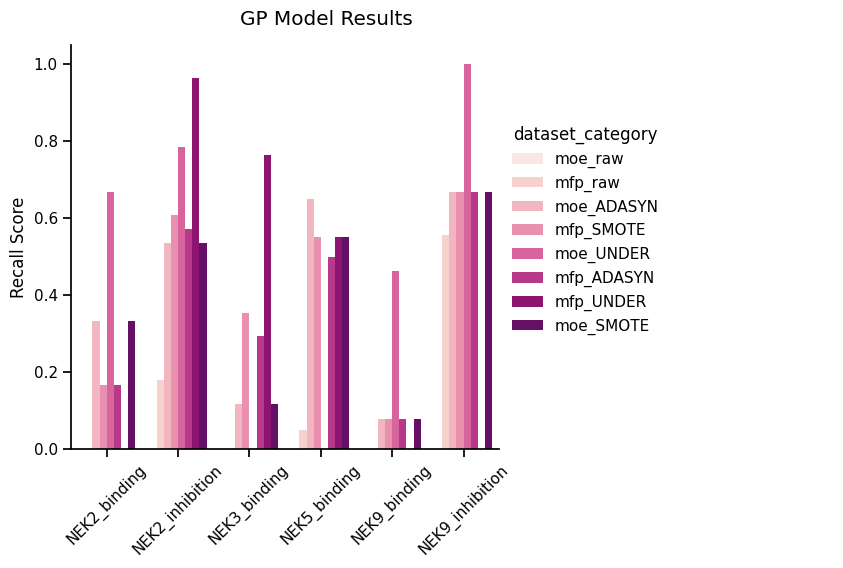

In [446]:
# plot_df = plot_df.sort_values('train actives/total%')
dflong=plot_df.melt(id_vars=['NEK', 'dataset_category', 'model'], value_vars=['recall'],
           var_name='Metric', value_name='Metric_value')
dflong=dflong.sort_values('dataset_category', ascending=False)

# display(dflong)

sns.set_context('notebook')
sns.set_palette('colorblind')
dflong = dflong.sort_values('NEK')
# grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=3, s=70, jitter=0.2)
grid=sns.catplot(dflong, x='NEK', y='Metric_value', hue='dataset_category', col='Metric',  kind='bar', col_wrap=2,palette=metric_palette2)

plt.ylabel('Recall Score')
# kwargs={'loc':(0.79, 0.15)}
sns.move_legend(grid, (0.6, 0.4))
grid.fig.subplots_adjust(top=0.95)
for ax in grid.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        ax.set_title('')
    ax.set_xlabel('')
        # ax.get_title().remove()
# plt.xticks(rotation=80)  
grid.fig.suptitle(f'GP Model Results',x=0.3,y=1.02);
plt.savefig(f"figures/GP_plots/GP_NEK_recall_scores.png",bbox_inches='tight')

plt.show();
    

# recall scores for each nek dataset

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_85825/2443702910.py:5: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  pl = sns.catplot(data=nek_df,x='NEK', y='recall', hue='dataset_category', kind='bar',palette=sampling_palette,legend_out=False)


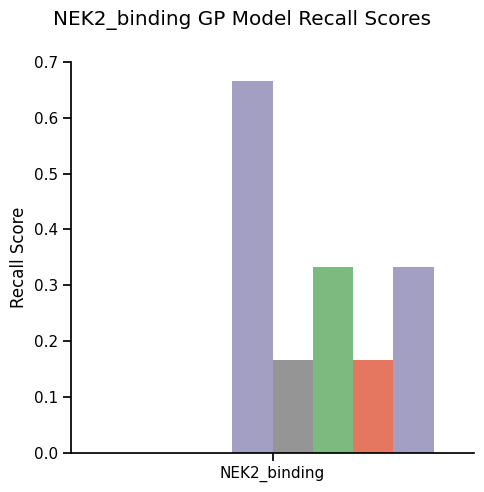

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_85825/2443702910.py:5: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  pl = sns.catplot(data=nek_df,x='NEK', y='recall', hue='dataset_category', kind='bar',palette=sampling_palette,legend_out=False)


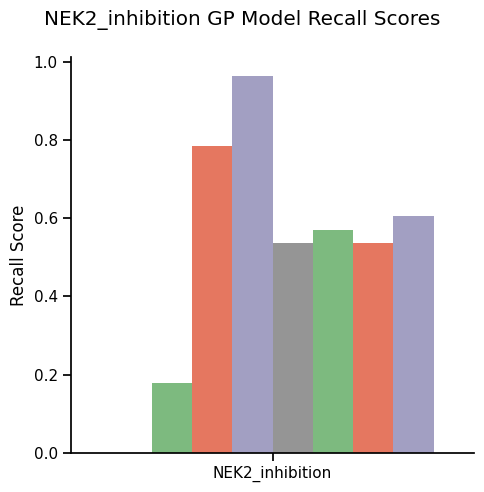

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_85825/2443702910.py:5: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  pl = sns.catplot(data=nek_df,x='NEK', y='recall', hue='dataset_category', kind='bar',palette=sampling_palette,legend_out=False)


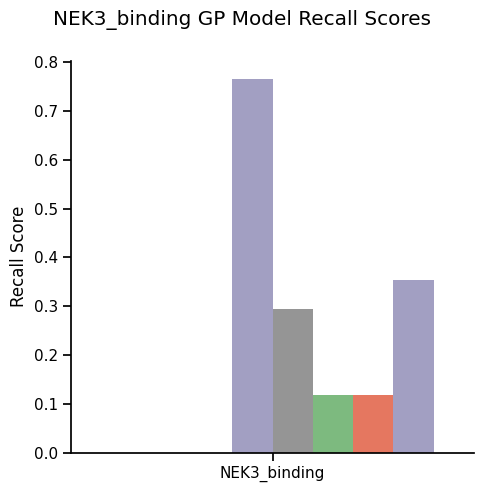

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_85825/2443702910.py:5: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  pl = sns.catplot(data=nek_df,x='NEK', y='recall', hue='dataset_category', kind='bar',palette=sampling_palette,legend_out=False)


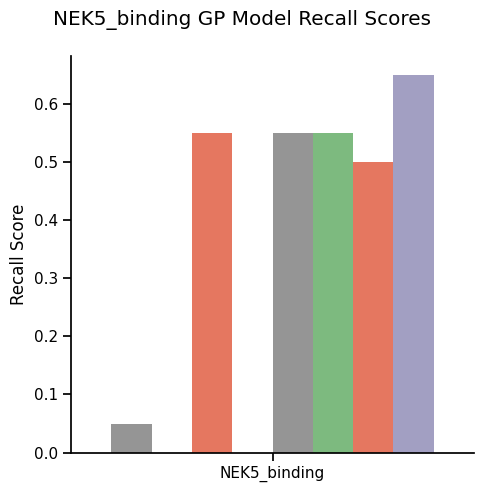

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_85825/2443702910.py:5: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  pl = sns.catplot(data=nek_df,x='NEK', y='recall', hue='dataset_category', kind='bar',palette=sampling_palette,legend_out=False)


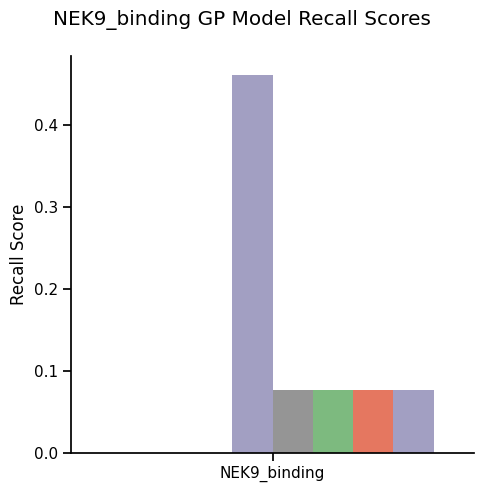

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_85825/2443702910.py:5: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  pl = sns.catplot(data=nek_df,x='NEK', y='recall', hue='dataset_category', kind='bar',palette=sampling_palette,legend_out=False)


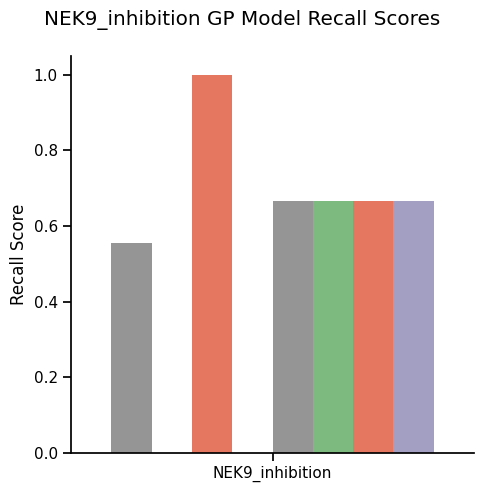

In [459]:

neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for n, nek in enumerate(neks): 
    nek_df = plot_df[plot_df['NEK'] ==nek]
    # pl = sns.catplot(data=plot_df,x='NEK', y='recall', hue='strategy', col='feat_type', kind='bar')
    pl = sns.catplot(data=nek_df,x='NEK', y='recall', hue='dataset_category', kind='bar',palette=sampling_palette,legend_out=False)
    for ax in pl.axes.flat:
        # for label in ax.get_xticklabels():
        #     label.set_rotation(80)
        ax.set(xlabel='')
        if ax.get_legend(): 
            ax.get_legend().remove()
    plt.suptitle(f'{nek} GP Model Recall Scores')
    # plt.legend(loc='center right')
    # pl._legend.set_bbox_to_anchor([1.15, 0.5])
    
    # pl._legend.set_frame_on(False)
    plt.subplots_adjust(top=0.9)
    plt.ylabel('Recall Score')
    
    plt.tight_layout()
    plt.savefig(f"figures/GP_plots/GP_{nek}_recall_scores_individ.png",bbox_inches='tight')
    plt.show();


# Recall scores for each model, but subplot for moe and mfp separately

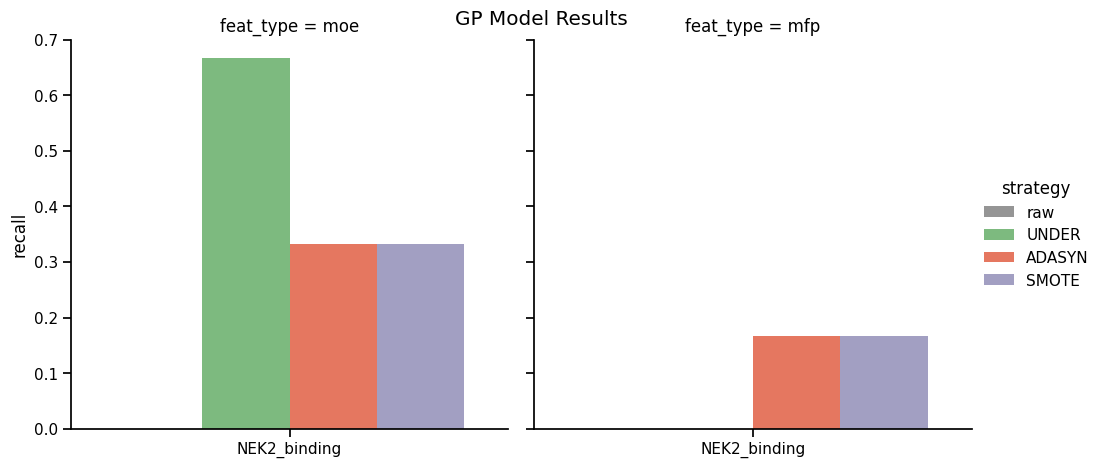

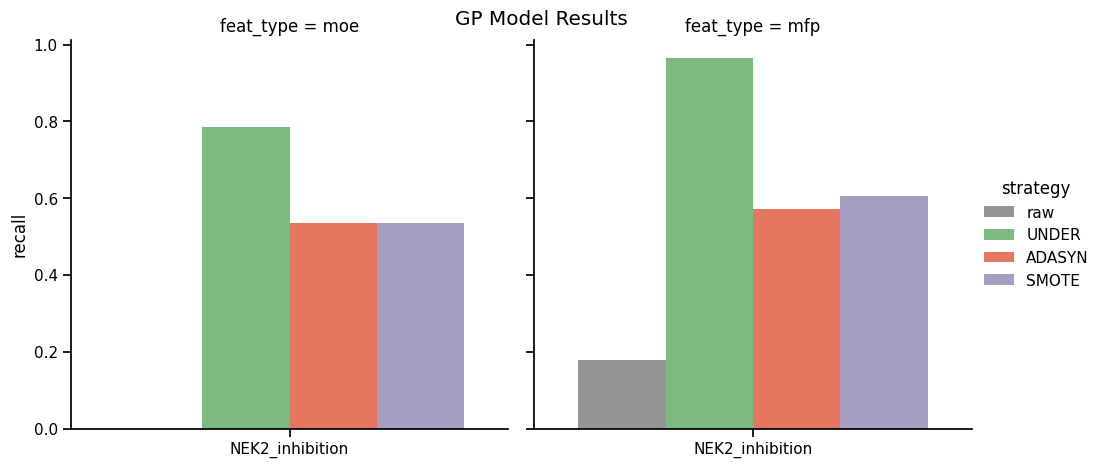

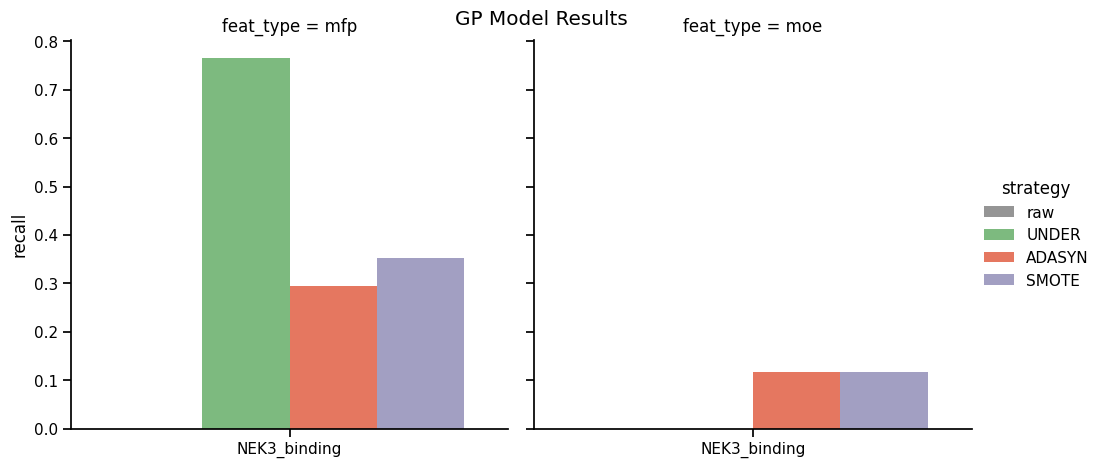

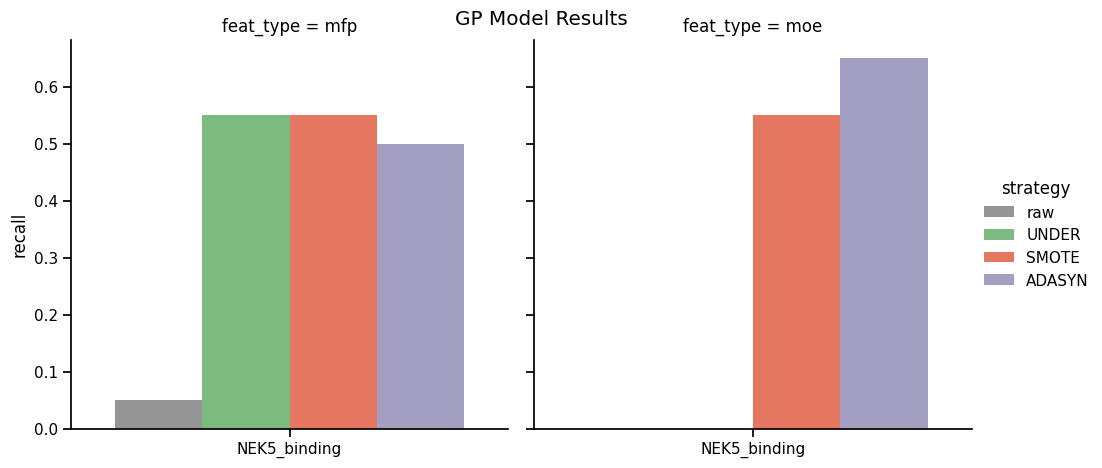

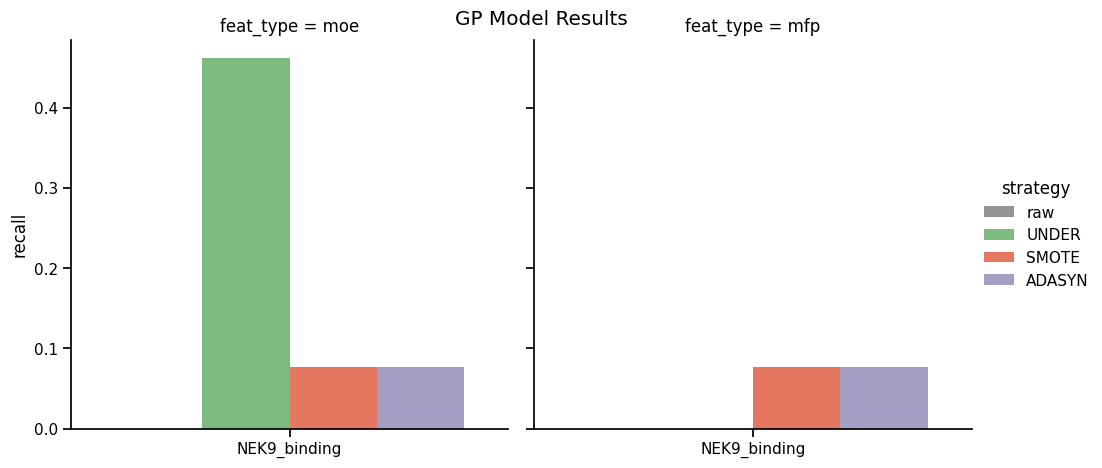

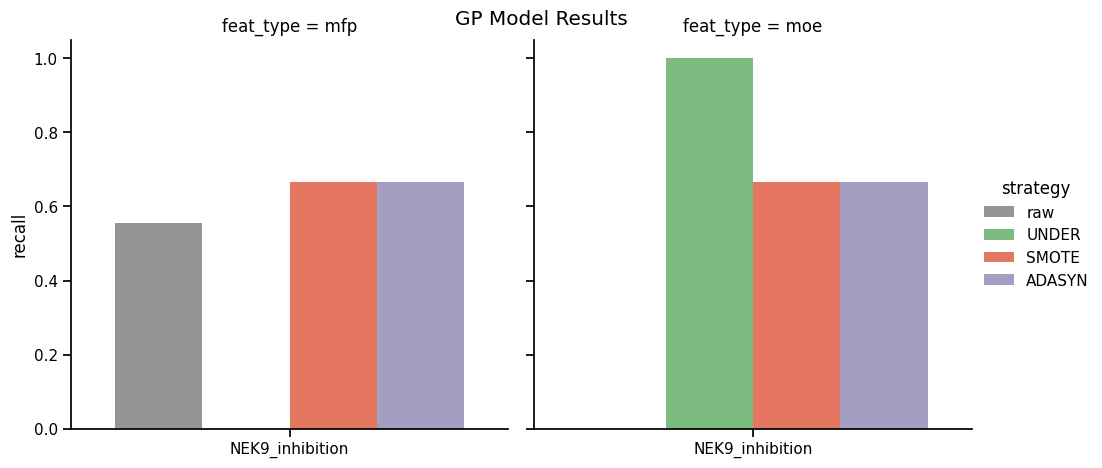

In [463]:
# plt.bar(df['model'], df['recall'])

# value_vars=['accuracy','precision', 'recall','specificity', 'ROC-AUC', 'MCC', 'Balanced Accuracy','f1']
value_vars=['recall']
for n, nek in enumerate(neks): 
    nek_df = plot_df[plot_df['NEK'] ==nek]
    dflong=nek_df.melt(id_vars=['NEK', 'dataset_category', 'strategy','model'], value_vars=['recall'],
           var_name='Metric', value_name='Metric_value')
    dflong=dflong.sort_values('dataset_category', ascending=False)
    # display(dflong)
    sns.set_context('notebook')
    sns.set_palette('colorblind')

    grid=sns.catplot(data=nek_df,x='NEK', y='recall', hue='strategy', col='feat_type', kind='bar',palette=sampling_palette)
    for ax in grid.axes.flat:
        ax.set(xlabel='')
        # for label in ax.get_xticklabels():
        #     label.set_rotation(80)
    plt.ylabel('Recall Score')
    # plt.ylabel('Recall Score')
    # kwargs={'loc':(0.79, 0.15)}
    # sns.move_legend(grid, (0.6, 0.15))
    # grid.fig.subplots_adjust(top=0.95)
    # plt.xticks(rotation=80)  
    grid.fig.suptitle(f'GP Model Results');

# all nek recall scores dataset type as barcolors  

In [475]:
plot_df.columns

Index(['accuracy', 'precision', 'recall', 'specificity', 'ROC-AUC', 'MCC',
       'Balanced Accuracy', 'f1', 'cm', 'NEK', 'model', 'feat_type',
       'strategy', 'dataset_category', 'num_samples_train', 'actives_train',
       'active%_train', 'num_samples_test', 'actives_test', 'active%_test',
       'total_size', 'total_actives', 'total actives/total%',
       'train actives/total%'],
      dtype='object')

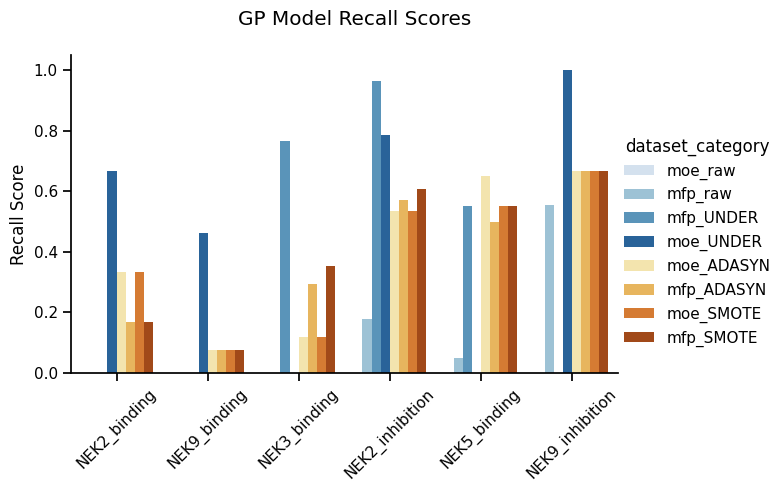

In [477]:
# pl = sns.catplot(data=plot_df,x='NEK', y='recall', hue='strategy', col='feat_type', kind='bar') # subplots ofr moe and mfp 
plot_df = plot_df.sort_values('total actives/total%')
pl = sns.catplot(data=plot_df,x='NEK', y='recall', hue='dataset_category', kind='bar',palette=dataset_palette) # all on one plot
for ax in pl.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.set(xlabel='')
plt.suptitle(f'GP Model Recall Scores',x=0.55)
pl._legend.set_bbox_to_anchor([1.19, 0.5])

plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.ylabel('Recall Score')
plt.savefig(f"figures/GP_plots/GP_recall_scores_all_NEK_sorted.png",bbox_inches='tight')
plt.show();


# Comparing recall scores 


NEK2_binding


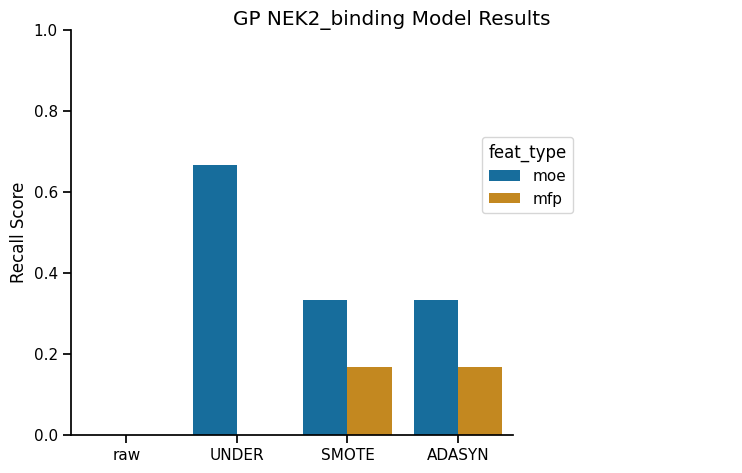


NEK2_inhibition


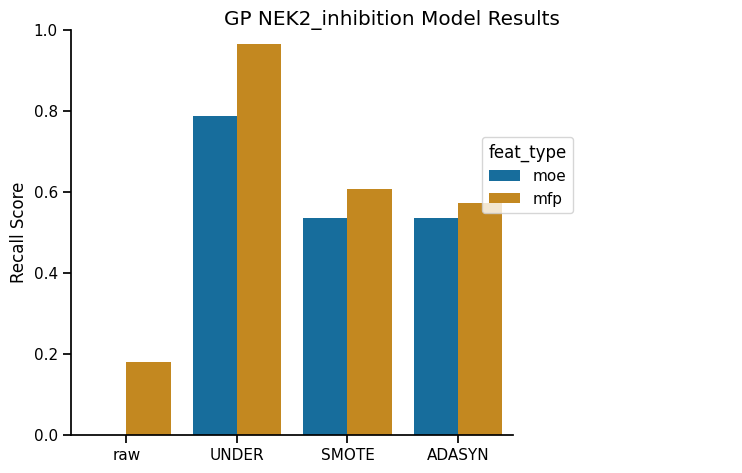


NEK3_binding


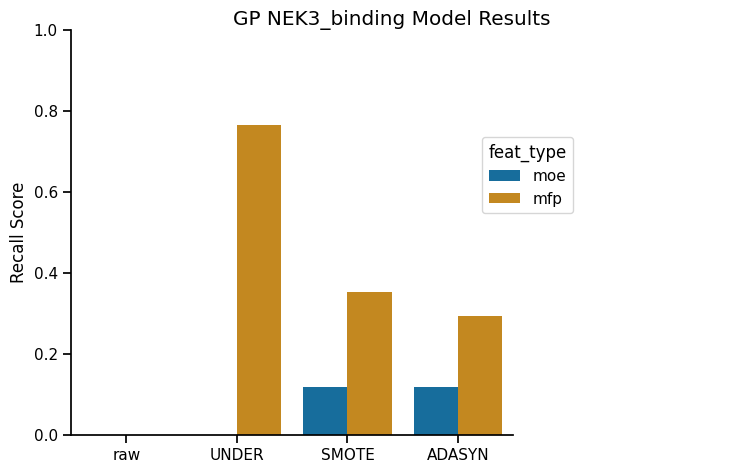


NEK5_binding


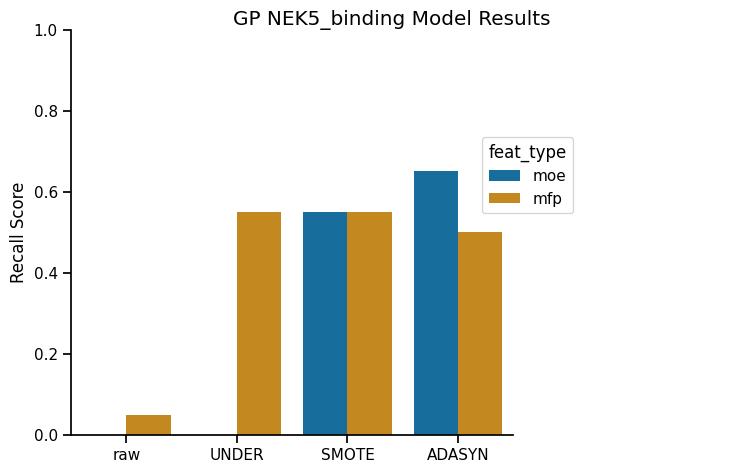


NEK9_binding


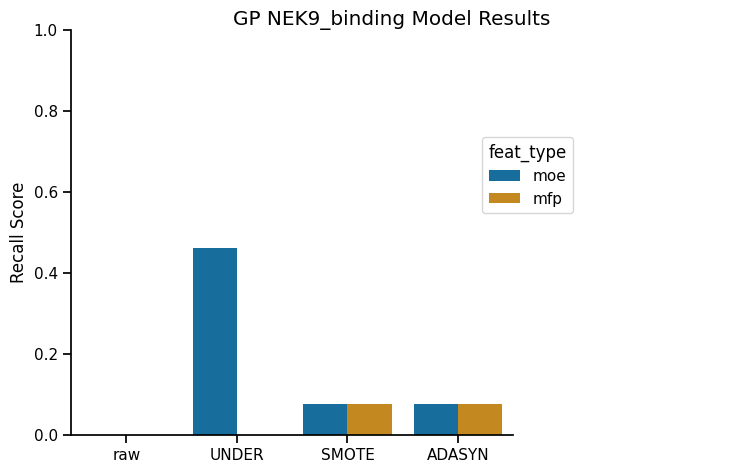


NEK9_inhibition


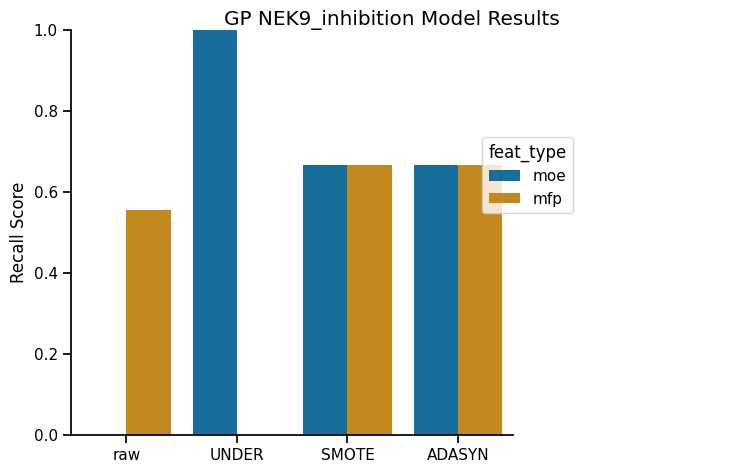

In [496]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
# value_vars=['accuracy','precision', 'recall','specificity', 'ROC-AUC', 'MCC', 'Balanced Accuracy','f1']
value_vars=['recall']
for n, nek in enumerate(neks): 
    nek_df = test_df[test_df['NEK'] ==nek]
    print(nek)
    dflong=nek_df.melt(id_vars=['strategy', 'feat_type', 'model'], value_vars=['recall'],
           var_name='Metric', value_name='Metric_value')
    # dflong=dflong.sort_values('Metric')
    
    # display(dflong)
    sns.set_context('notebook')
    sns.set_palette('colorblind')
    # grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=3, s=70, jitter=0.2)
    grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=2, legend_out=False)
    for ax in grid.axes.flat:
        # for label in ax.get_xticklabels():
        #     label.set_rotation(80)
        ax.set(xlabel='')
        ax.set_title('')
        if ax.get_legend(): 
            ax.get_legend().remove()
        ax.set(ylim=(0,1))
        
    plt.ylabel('Recall Score')
    
    # kwargs={'loc':(0.79, 0.15)}
    sns.move_legend(grid, (0.65, 0.55))
    grid.fig.subplots_adjust(top=0.95)
    grid.fig.suptitle(f'GP {nek} Model Results',x=0.4,y=.99);
    plt.savefig(f"figures/GP_plots/GP_{nek}_metrics_catplot_splitmoemfp.png")
    
    plt.show();
    
    print()

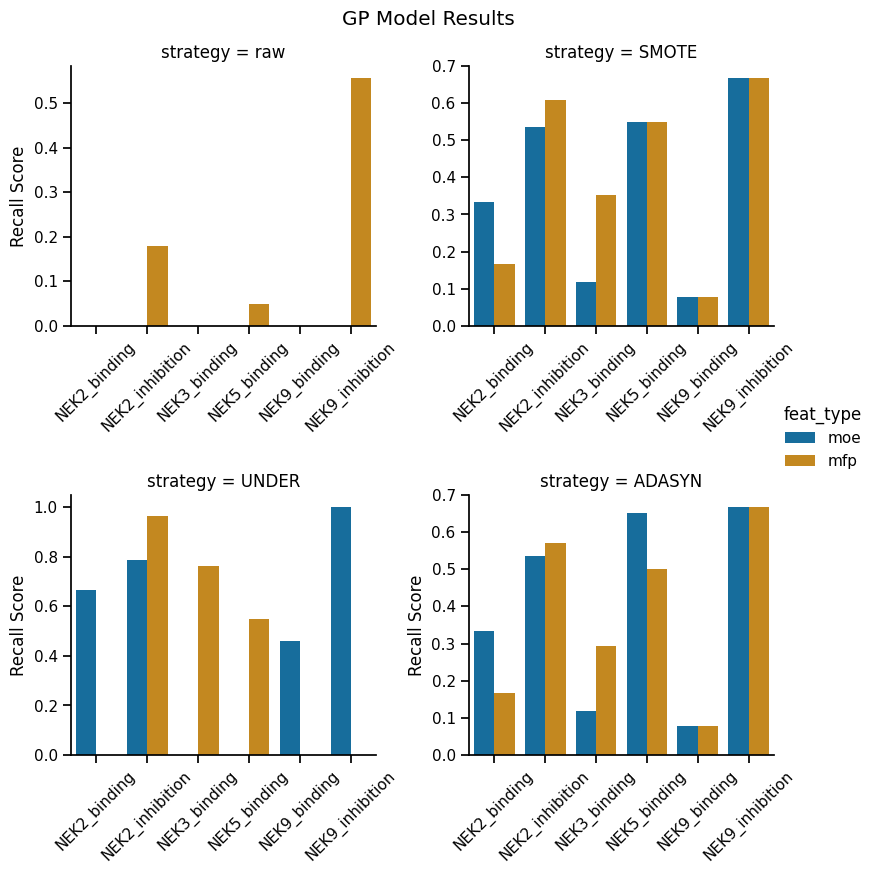

In [506]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
# value_vars=['accuracy','precision', 'recall','specificity', 'ROC-AUC', 'MCC', 'Balanced Accuracy','f1']
value_vars=['recall']

dflong=plot_df.melt(id_vars=['strategy', 'feat_type', 'model','NEK'], value_vars=['recall'],
       var_name='Metric', value_name='Recall Score')
dflong=dflong.sort_values('NEK')
grid=sns.catplot(dflong, x='NEK', y='Recall Score', hue='feat_type', col='strategy',  kind='bar', col_wrap=2,height=4,sharex=False, sharey=False)
# sns.move_legend(grid, (0.9, 0.5))
plt.ylabel('Recall Score')
grid.fig.subplots_adjust(hspace=0.65)
grid.fig.subplots_adjust(top=0.95)
for ax in grid.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.set(xlabel='')
grid.fig.suptitle(f'GP Model Results', y=1.02)
# grid=sns.move_legend(grid, (1.1, 0.55))
plt.savefig(f"figures/GP_plots/GP_NEK_recall_by_strategy.png",bbox_inches='tight')

plt.show();

print()

# Comparison of imbalance

In [448]:

# for n, nek in enumerate(neks): 
#     nek_df = plot_df[plot_df['NEK'] ==nek]
#     plt.figure()
#     print(nek)
    
#     g = sns.scatterplot(data=nek_df, x='precision', y='recall', hue='strategy', size='percent_active', style=None, palette=None, hue_order=None, hue_norm=None, 
#                         sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None)
#     # g = sns.scatterplot(data=nek_df, x='percent_active', y='recall', hue='strategy', size='feat_type', style=None, palette=None, hue_order=None, hue_norm=None, 
#     #                     sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None)
#     # sns.move_legend(grid, (1, 0.15))
#     plt.legend(loc='upper center')
#     # g.fig.subplots_adjust(top=0.95)
    
    
#     plt.show();
    


In [507]:
plot_df['NEK#'] = plot_df['NEK'].str[0:4]
# plot_df['NEK_strat'] = plot_df['NEK'].str().concat(plot_df[')

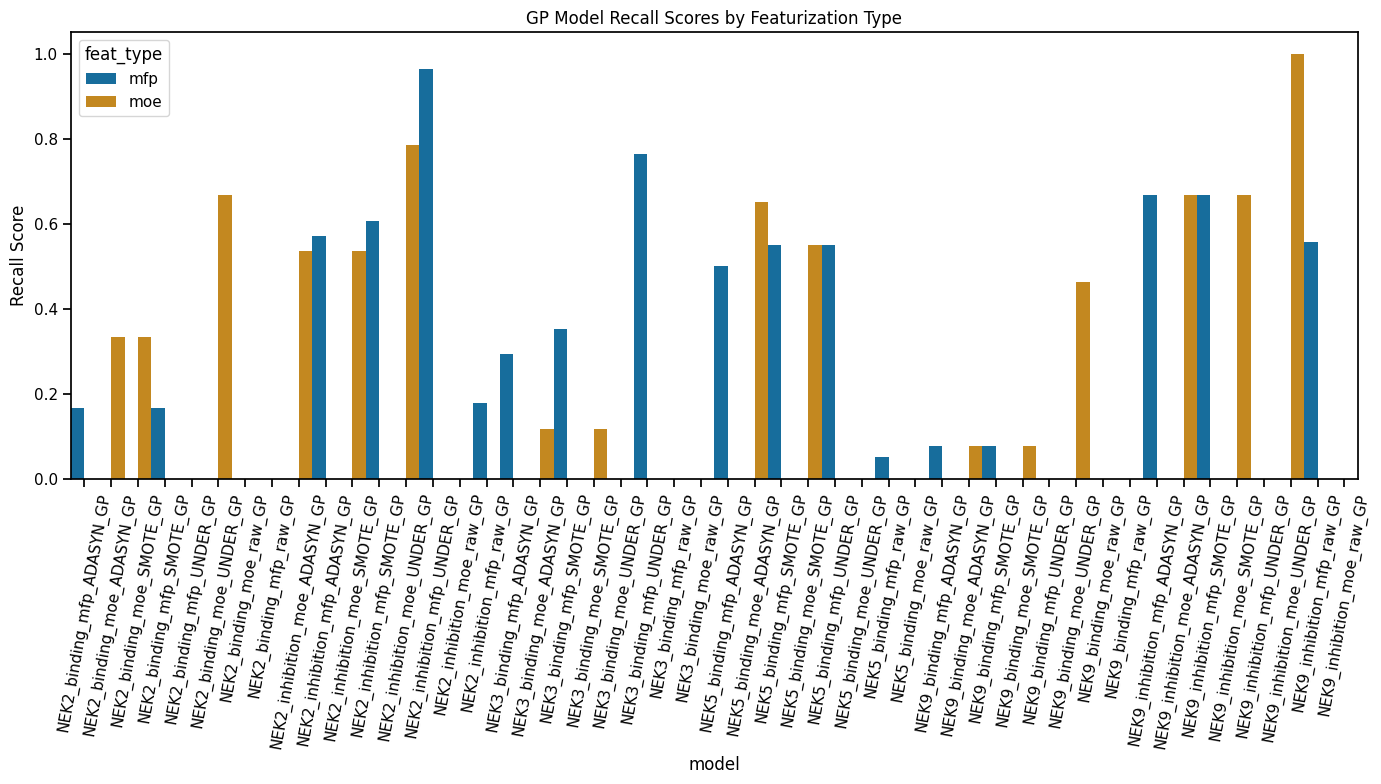

In [509]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
dflong=plot_df.melt(id_vars=['NEK#','NEK','dataset_category','model', 'feat_type', 'strategy'], value_vars=['recall'],
       var_name='Metric', value_name='Metric_value')
dflong=dflong.sort_values('Metric')
dflong = dflong.sort_values(by=['NEK', 'strategy'], ascending=[True, True])
# dflong =dflong.sort_values('strategy')
sns.set_context('notebook')
sns.set_palette('colorblind')

# grid=sns.catplot(dflong, x='model', y='Metric_value', hue='feat_type', col='strategy',  kind='bar', col_wrap=2)
plt.figure(figsize=(14, 8))
sns.barplot(data=dflong, x='model', y='Metric_value', hue='feat_type', dodge=True, width=1.)

plt.ylabel('Recall Score')
# kwargs={'loc':(0.79, 0.15)}
sns.move_legend(grid, (0.9, 0.15))
grid.fig.subplots_adjust(top=0.95)

for ax in grid.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(80)
plt.xticks(rotation=80)
plt.title('GP Model Recall Scores by Featurization Type')
plt.tight_layout()
# grid.fig.suptitle(f'GP Model Results {nek}');
plt.savefig(f"figures/GP_plots/GP_all_recall_moemfp.png")

plt.show();

print()


In [510]:
print('GP average recall scores')
for nek in neks: 
    nek_df = test_df[test_df['NEK']==nek]
    average_recall = nek_df['recall'].mean()
    print(f'{nek} average recall score: {average_recall}')

GP average recall scores
NEK2_binding average recall score: 0.20833333333333331
NEK2_inhibition average recall score: 0.5223214285714286
NEK3_binding average recall score: 0.20588235294117646
NEK5_binding average recall score: 0.35625000000000007
NEK9_binding average recall score: 0.09615384615384615
NEK9_inhibition average recall score: 0.5277777777777777


In [511]:
for n in neks: 
    print(n)
    cols = ['NEK', 'feat_type', 'strategy',	'precision',	'recall','cm']
    csv_df = test_df[test_df['NEK']==n]
    grouped_by = csv_df.groupby('strategy')
    for n, gr in grouped_by: 
        display(gr[cols])
    print()
        

NEK2_binding


,NEK,feat_type,strategy,precision,recall,cm
3,NEK2_binding,moe,ADASYN,0.571429,0.333333,"[268, 3, 8, 4]"
7,NEK2_binding,mfp,ADASYN,1.000000,0.166667,"[271, 0, 10, 2]"


,NEK,feat_type,strategy,precision,recall,cm
2,NEK2_binding,moe,SMOTE,1.0,0.333333,"[271, 0, 8, 4]"
6,NEK2_binding,mfp,SMOTE,1.0,0.166667,"[271, 0, 10, 2]"


,NEK,feat_type,strategy,precision,recall,cm
1,NEK2_binding,moe,UNDER,0.102564,0.666667,"[201, 70, 4, 8]"
5,NEK2_binding,mfp,UNDER,0.000000,0.000000,"[270, 1, 12, 0]"


,NEK,feat_type,strategy,precision,recall,cm
0,NEK2_binding,moe,raw,0.0,0.0,"[271, 0, 12, 0]"
4,NEK2_binding,mfp,raw,0.0,0.0,"[271, 0, 12, 0]"



NEK2_inhibition


,NEK,feat_type,strategy,precision,recall,cm
11,NEK2_inhibition,moe,ADASYN,0.652174,0.535714,"[373, 8, 13, 15]"
15,NEK2_inhibition,mfp,ADASYN,0.888889,0.571429,"[379, 2, 12, 16]"


,NEK,feat_type,strategy,precision,recall,cm
10,NEK2_inhibition,moe,SMOTE,0.681818,0.535714,"[374, 7, 13, 15]"
14,NEK2_inhibition,mfp,SMOTE,0.894737,0.607143,"[379, 2, 11, 17]"


,NEK,feat_type,strategy,precision,recall,cm
9,NEK2_inhibition,moe,UNDER,0.309859,0.785714,"[332, 49, 6, 22]"
13,NEK2_inhibition,mfp,UNDER,0.068878,0.964286,"[16, 365, 1, 27]"


,NEK,feat_type,strategy,precision,recall,cm
8,NEK2_inhibition,moe,raw,0.0,0.000000,"[381, 0, 28, 0]"
12,NEK2_inhibition,mfp,raw,1.0,0.178571,"[381, 0, 23, 5]"



NEK3_binding


,NEK,feat_type,strategy,precision,recall,cm
19,NEK3_binding,moe,ADASYN,0.105263,0.117647,"[248, 17, 15, 2]"
23,NEK3_binding,mfp,ADASYN,0.555556,0.294118,"[261, 4, 12, 5]"


,NEK,feat_type,strategy,precision,recall,cm
18,NEK3_binding,moe,SMOTE,0.111111,0.117647,"[249, 16, 15, 2]"
22,NEK3_binding,mfp,SMOTE,0.750000,0.352941,"[263, 2, 11, 6]"


,NEK,feat_type,strategy,precision,recall,cm
17,NEK3_binding,moe,UNDER,0.00000,0.000000,"[263, 2, 17, 0]"
21,NEK3_binding,mfp,UNDER,0.08125,0.764706,"[118, 147, 4, 13]"


,NEK,feat_type,strategy,precision,recall,cm
16,NEK3_binding,moe,raw,0.0,0.0,"[265, 0, 17, 0]"
20,NEK3_binding,mfp,raw,0.0,0.0,"[265, 0, 17, 0]"



NEK5_binding


,NEK,feat_type,strategy,precision,recall,cm
27,NEK5_binding,moe,ADASYN,0.619048,0.65,"[220, 8, 7, 13]"
31,NEK5_binding,mfp,ADASYN,0.833333,0.50,"[226, 2, 10, 10]"


,NEK,feat_type,strategy,precision,recall,cm
26,NEK5_binding,moe,SMOTE,0.611111,0.55,"[221, 7, 9, 11]"
30,NEK5_binding,mfp,SMOTE,0.846154,0.55,"[226, 2, 9, 11]"


,NEK,feat_type,strategy,precision,recall,cm
25,NEK5_binding,moe,UNDER,0.000000,0.00,"[228, 0, 20, 0]"
29,NEK5_binding,mfp,UNDER,0.096491,0.55,"[125, 103, 9, 11]"


,NEK,feat_type,strategy,precision,recall,cm
24,NEK5_binding,moe,raw,0.0,0.00,"[228, 0, 20, 0]"
28,NEK5_binding,mfp,raw,1.0,0.05,"[228, 0, 19, 1]"



NEK9_binding


,NEK,feat_type,strategy,precision,recall,cm
35,NEK9_binding,moe,ADASYN,0.166667,0.076923,"[265, 5, 12, 1]"
39,NEK9_binding,mfp,ADASYN,0.333333,0.076923,"[268, 2, 12, 1]"


,NEK,feat_type,strategy,precision,recall,cm
34,NEK9_binding,moe,SMOTE,0.200000,0.076923,"[266, 4, 12, 1]"
38,NEK9_binding,mfp,SMOTE,0.333333,0.076923,"[268, 2, 12, 1]"


,NEK,feat_type,strategy,precision,recall,cm
33,NEK9_binding,moe,UNDER,0.057692,0.461538,"[172, 98, 7, 6]"
37,NEK9_binding,mfp,UNDER,0.000000,0.000000,"[270, 0, 13, 0]"


,NEK,feat_type,strategy,precision,recall,cm
32,NEK9_binding,moe,raw,0.0,0.0,"[270, 0, 13, 0]"
36,NEK9_binding,mfp,raw,0.0,0.0,"[270, 0, 13, 0]"



NEK9_inhibition


,NEK,feat_type,strategy,precision,recall,cm
43,NEK9_inhibition,moe,ADASYN,0.857143,0.666667,"[70, 1, 3, 6]"
47,NEK9_inhibition,mfp,ADASYN,0.857143,0.666667,"[70, 1, 3, 6]"


,NEK,feat_type,strategy,precision,recall,cm
42,NEK9_inhibition,moe,SMOTE,0.857143,0.666667,"[70, 1, 3, 6]"
46,NEK9_inhibition,mfp,SMOTE,0.857143,0.666667,"[70, 1, 3, 6]"


,NEK,feat_type,strategy,precision,recall,cm
41,NEK9_inhibition,moe,UNDER,0.1125,1.0,"[0, 71, 0, 9]"
45,NEK9_inhibition,mfp,UNDER,0.0000,0.0,"[71, 0, 9, 0]"


,NEK,feat_type,strategy,precision,recall,cm
40,NEK9_inhibition,moe,raw,0.000000,0.000000,"[70, 1, 9, 0]"
44,NEK9_inhibition,mfp,raw,0.833333,0.555556,"[70, 1, 4, 5]"


In [512]:
for n in neks: 
    grouped_test_df= test_df[test_df['NEK']==n]
    # display(grouped_test_df)
    print(n)
    # grouped_strat = nekdf.groupby('strategy')['Metric_value'].idxmax()
    grouped_strat = grouped_test_df.loc[grouped_test_df.groupby('strategy')['recall'].idxmax(), ['NEK','strategy','feat_type', 'model','recall']]
    display(grouped_strat)
    print() 

NEK2_binding


,NEK,strategy,feat_type,model,recall
3,NEK2_binding,ADASYN,moe,NEK2_binding_moe_ADASYN_GP,0.333333
2,NEK2_binding,SMOTE,moe,NEK2_binding_moe_SMOTE_GP,0.333333
1,NEK2_binding,UNDER,moe,NEK2_binding_moe_UNDER_GP,0.666667
0,NEK2_binding,raw,moe,NEK2_binding_moe_raw_GP,0.000000



NEK2_inhibition


,NEK,strategy,feat_type,model,recall
15,NEK2_inhibition,ADASYN,mfp,NEK2_inhibition_mfp_ADASYN_GP,0.571429
14,NEK2_inhibition,SMOTE,mfp,NEK2_inhibition_mfp_SMOTE_GP,0.607143
13,NEK2_inhibition,UNDER,mfp,NEK2_inhibition_mfp_UNDER_GP,0.964286
12,NEK2_inhibition,raw,mfp,NEK2_inhibition_mfp_raw_GP,0.178571



NEK3_binding


,NEK,strategy,feat_type,model,recall
23,NEK3_binding,ADASYN,mfp,NEK3_binding_mfp_ADASYN_GP,0.294118
22,NEK3_binding,SMOTE,mfp,NEK3_binding_mfp_SMOTE_GP,0.352941
21,NEK3_binding,UNDER,mfp,NEK3_binding_mfp_UNDER_GP,0.764706
16,NEK3_binding,raw,moe,NEK3_binding_moe_raw_GP,0.000000



NEK5_binding


,NEK,strategy,feat_type,model,recall
27,NEK5_binding,ADASYN,moe,NEK5_binding_moe_ADASYN_GP,0.65
26,NEK5_binding,SMOTE,moe,NEK5_binding_moe_SMOTE_GP,0.55
29,NEK5_binding,UNDER,mfp,NEK5_binding_mfp_UNDER_GP,0.55
28,NEK5_binding,raw,mfp,NEK5_binding_mfp_raw_GP,0.05



NEK9_binding


,NEK,strategy,feat_type,model,recall
35,NEK9_binding,ADASYN,moe,NEK9_binding_moe_ADASYN_GP,0.076923
34,NEK9_binding,SMOTE,moe,NEK9_binding_moe_SMOTE_GP,0.076923
33,NEK9_binding,UNDER,moe,NEK9_binding_moe_UNDER_GP,0.461538
32,NEK9_binding,raw,moe,NEK9_binding_moe_raw_GP,0.000000



NEK9_inhibition


,NEK,strategy,feat_type,model,recall
43,NEK9_inhibition,ADASYN,moe,NEK9_inhibition_moe_ADASYN_GP,0.666667
42,NEK9_inhibition,SMOTE,moe,NEK9_inhibition_moe_SMOTE_GP,0.666667
41,NEK9_inhibition,UNDER,moe,NEK9_inhibition_moe_UNDER_GP,1.000000
44,NEK9_inhibition,raw,mfp,NEK9_inhibition_mfp_raw_GP,0.555556


In [513]:
# GP Model
result_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/GP/GP_results/'
data_dir = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/'
nek_nums = [3,5]
samplings = ['scaled', 'UNDER', 'SMOTE', 'ADASYN'] 
features = ['moe', 'mfp']
NEK= 'NEK'

for i, n in enumerate(nek_nums):
    nek = str(n)
    # print(f'NEK{nek}')
    nek_path= f'{data_dir}NEK{nek}/bind/'
    for k, feat in enumerate(features): 
        print()
        for j, samp in enumerate(samplings): 
        
            print(f'NEK{nek} bind {feat} {samp}')
            file_root = f'NEK{nek}_binding_{feat}_{samp}'
            dfname = file_root+'_df.csv'
            nek35 = pd.read_csv(nek_path+dfname)
            test35 = nek35[nek35['subset']=='test'] 
            test35['active'].value_counts
            print(test35['active'].value_counts())
            print()


NEK3 bind moe scaled
active
0    265
1     17
Name: count, dtype: int64

NEK3 bind moe UNDER
active
0    265
1     17
Name: count, dtype: int64

NEK3 bind moe SMOTE
active
0    265
1     17
Name: count, dtype: int64

NEK3 bind moe ADASYN
active
0    265
1     17
Name: count, dtype: int64


NEK3 bind mfp scaled
active
0    265
1     17
Name: count, dtype: int64

NEK3 bind mfp UNDER
active
0    265
1     17
Name: count, dtype: int64

NEK3 bind mfp SMOTE
active
0    265
1     17
Name: count, dtype: int64

NEK3 bind mfp ADASYN
active
0    265
1     17
Name: count, dtype: int64


NEK5 bind moe scaled
active
0    228
1     20
Name: count, dtype: int64

NEK5 bind moe UNDER
active
0    228
1     20
Name: count, dtype: int64

NEK5 bind moe SMOTE
active
0    228
1     20
Name: count, dtype: int64

NEK5 bind moe ADASYN
active
0    228
1     20
Name: count, dtype: int64


NEK5 bind mfp scaled
active
0    228
1     20
Name: count, dtype: int64

NEK5 bind mfp UNDER
active
0    228
1     20
Name: co

In [454]:
type(pl)

seaborn.axisgrid.FacetGrid

In [455]:
pl?



Type:           FacetGrid
String form:    <seaborn.axisgrid.FacetGrid object at 0x3e595d460>
File:           ~/msse/capstone/atomsci/lib/python3.9/site-packages/seaborn/axisgrid.py
Docstring:      Multi-plot grid for plotting conditional relationships.
Init docstring:
Initialize the matplotlib figure and FacetGrid object.

This class maps a dataset onto multiple axes arrayed in a grid of rows
and columns that correspond to *levels* of variables in the dataset.
The plots it produces are often called "lattice", "trellis", or
"small-multiple" graphics.

It can also represent levels of a third variable with the ``hue``
parameter, which plots different subsets of data in different colors.
This uses color to resolve elements on a third dimension, but only
draws subsets on top of each other and will not tailor the ``hue``
parameter for the specific visualization the way that axes-level
functions that accept ``hue`` will.

The basic workflow is to initialize the :class:`FacetGrid` object with


In [456]:
df2 = pd.read_csv('../GP/GP_results/GP_test_results_all_NEK.csv')
df2.shape

(48, 17)

In [109]:
plot_df[['model', 'cm', 'recall', 'NEK']]


,model,cm,recall,NEK
0,NEK2_binding_moe_scaled_GP,"[271, 0, 12, 0]",0.000000,NEK2_binding
1,NEK2_binding_moe_UNDER_GP,"[201, 70, 4, 8]",0.666667,NEK2_binding
2,NEK2_binding_moe_SMOTE_GP,"[271, 0, 8, 4]",0.333333,NEK2_binding
3,NEK2_binding_moe_ADASYN_GP,"[268, 3, 8, 4]",0.333333,NEK2_binding
4,NEK2_binding_mfp_scaled_GP,"[271, 0, 12, 0]",0.000000,NEK2_binding
5,NEK2_binding_mfp_UNDER_GP,"[270, 1, 12, 0]",0.000000,NEK2_binding
6,NEK2_binding_mfp_SMOTE_GP,"[271, 0, 10, 2]",0.166667,NEK2_binding
7,NEK2_binding_mfp_ADASYN_GP,"[271, 0, 10, 2]",0.166667,NEK2_binding
8,NEK2_inhibition_moe_scaled_GP,"[381, 0, 28, 0]",0.000000,NEK2_inhibition
9,NEK2_inhibition_moe_UNDER_GP,"[332, 49, 6, 22]",0.785714,NEK2_inhibition


In [515]:
datapath = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/GP/GP_results/'
df2 = pd.read_csv(datapath+'GP_test_results_all_NEK.csv')
df2['strategy'] = df2['strategy'].str.replace('scaled', 'raw')
df2['model'] = df2['model'].str.replace('scaled', 'raw')
df2.set_index(['NEK',  'strategy', 'feat_type'], inplace=True)
df2 = df2.sort_values(['NEK','strategy'])
# df2 = df2.sort_values('strategy')
display(df2)
df2.to_csv(datapath+'GP_results_by_strategy.csv', index=True)


model  accuracy  \
NEK             strategy feat_type                                            
NEK2_binding    ADASYN   moe           NEK2_binding_moe_ADASYN_GP  0.961131   
                         mfp           NEK2_binding_mfp_ADASYN_GP  0.964664   
                SMOTE    moe            NEK2_binding_moe_SMOTE_GP  0.968198   
                         mfp            NEK2_binding_mfp_SMOTE_GP  0.964664   
                UNDER    moe            NEK2_binding_moe_UNDER_GP  0.738516   
                         mfp            NEK2_binding_mfp_UNDER_GP  0.954064   
                raw      moe              NEK2_binding_moe_raw_GP  0.957597   
                         mfp              NEK2_binding_mfp_raw_GP  0.957597   
NEK2_inhibition ADASYN   moe        NEK2_inhibition_moe_ADASYN_GP  0.951100   
                         mfp        NEK2_inhibition_mfp_ADASYN_GP  0.965770   
                SMOTE    moe         NEK2_inhibition_moe_SMOTE_GP  0.948655   
                         mfp         NEK2_inhibition_mfp_SMOTE_GP  0.968215   
                UNDER    moe         NEK2_inhibition_moe_UNDER_GP  0.865526   
                         mfp         NEK2_inhibition_mfp_UNDER_GP  0.105134   
                raw      moe           NEK2_inhibition_moe_raw_GP  0.931540   
                         mfp           NEK2_inhibition_mfp_raw_GP  0.943765   
NEK3_binding    ADASYN   moe           NEK3_binding_moe_ADASYN_GP  0.886525   
                         mfp           NEK3_binding_mfp_ADASYN_GP  0.943262   
                SMOTE    moe            NEK3_binding_moe_SMOTE_GP  0.890071   
                         mfp            NEK3_binding_mfp_SMOTE_GP  0.953901   
                UNDER    moe            NEK3_binding_moe_UNDER_GP  0.932624   
                         mfp            NEK3_binding_mfp_UNDER_GP  0.464539   
                raw      moe              NEK3_binding_moe_raw_GP  0.939716   
                         mfp              NEK3_binding_mfp_raw_GP  0.939716   
NEK5_binding    ADASYN   moe           NEK5_binding_moe_ADASYN_GP  0.939516   
                         mfp           NEK5_binding_mfp_ADASYN_GP  0.951613   
                SMOTE    moe            NEK5_binding_moe_SMOTE_GP  0.927419   
                         mfp            NEK5_binding_mfp_SMOTE_GP  0.955645   
                UNDER    moe            NEK5_binding_moe_UNDER_GP  0.919355   
                         mfp            NEK5_binding_mfp_UNDER_GP  0.548387   
                raw      moe              NEK5_binding_moe_raw_GP  0.919355   
                         mfp              NEK5_binding_mfp_raw_GP  0.923387   
NEK9_binding    ADASYN   moe           NEK9_binding_moe_ADASYN_GP  0.943463   
                         mfp           NEK9_binding_mfp_ADASYN_GP  0.950530   
                SMOTE    moe            NEK9_binding_moe_SMOTE_GP  0.943463   
                         mfp            NEK9_binding_mfp_SMOTE_GP  0.950530   
                UNDER    moe            NEK9_binding_moe_UNDER_GP  0.628975   
                         mfp            NEK9_binding_mfp_UNDER_GP  0.954064   
                raw      moe              NEK9_binding_moe_raw_GP  0.954064   
                         mfp              NEK9_binding_mfp_raw_GP  0.954064   
NEK9_inhibition ADASYN   moe        NEK9_inhibition_moe_ADASYN_GP  0.950000   
                         mfp        NEK9_inhibition_mfp_ADASYN_GP  0.950000   
                SMOTE    moe         NEK9_inhibition_moe_SMOTE_GP  0.950000   
                         mfp         NEK9_inhibition_mfp_SMOTE_GP  0.950000   
                UNDER    moe         NEK9_inhibition_moe_UNDER_GP  0.112500   
                         mfp         NEK9_inhibition_mfp_UNDER_GP  0.887500   
                raw      moe           NEK9_inhibition_moe_raw_GP  0.875000   
                         mfp           NEK9_inhibition_mfp_raw_GP  0.937500   

                                    precision    recall  specificity   TN  FN  \
NEK             strategy fea

In [516]:
df3 = pd.read_csv(datapath+'GP_test_results_all_NEK.csv')
df3['strategy'] = df3['strategy'].str.replace('scaled', 'raw')
df3['model'] = df3['model'].str.replace('scaled', 'raw')
df3.set_index(['NEK', 'feat_type','strategy'],inplace=True)
df3.sort_values(['NEK','feat_type', 'strategy'], inplace=True)
display(df3)
df3.to_csv(datapath+'GP_results_by_feat_type.csv', index=True)
# df3.to_excel(datapath+'GP_results_by_feat_type.xlsx', index=True)


model  accuracy  \
NEK             feat_type strategy                                            
NEK2_binding    mfp       ADASYN       NEK2_binding_mfp_ADASYN_GP  0.964664   
                          SMOTE         NEK2_binding_mfp_SMOTE_GP  0.964664   
                          UNDER         NEK2_binding_mfp_UNDER_GP  0.954064   
                          raw             NEK2_binding_mfp_raw_GP  0.957597   
                moe       ADASYN       NEK2_binding_moe_ADASYN_GP  0.961131   
                          SMOTE         NEK2_binding_moe_SMOTE_GP  0.968198   
                          UNDER         NEK2_binding_moe_UNDER_GP  0.738516   
                          raw             NEK2_binding_moe_raw_GP  0.957597   
NEK2_inhibition mfp       ADASYN    NEK2_inhibition_mfp_ADASYN_GP  0.965770   
                          SMOTE      NEK2_inhibition_mfp_SMOTE_GP  0.968215   
                          UNDER      NEK2_inhibition_mfp_UNDER_GP  0.105134   
                          raw          NEK2_inhibition_mfp_raw_GP  0.943765   
                moe       ADASYN    NEK2_inhibition_moe_ADASYN_GP  0.951100   
                          SMOTE      NEK2_inhibition_moe_SMOTE_GP  0.948655   
                          UNDER      NEK2_inhibition_moe_UNDER_GP  0.865526   
                          raw          NEK2_inhibition_moe_raw_GP  0.931540   
NEK3_binding    mfp       ADASYN       NEK3_binding_mfp_ADASYN_GP  0.943262   
                          SMOTE         NEK3_binding_mfp_SMOTE_GP  0.953901   
                          UNDER         NEK3_binding_mfp_UNDER_GP  0.464539   
                          raw             NEK3_binding_mfp_raw_GP  0.939716   
                moe       ADASYN       NEK3_binding_moe_ADASYN_GP  0.886525   
                          SMOTE         NEK3_binding_moe_SMOTE_GP  0.890071   
                          UNDER         NEK3_binding_moe_UNDER_GP  0.932624   
                          raw             NEK3_binding_moe_raw_GP  0.939716   
NEK5_binding    mfp       ADASYN       NEK5_binding_mfp_ADASYN_GP  0.951613   
                          SMOTE         NEK5_binding_mfp_SMOTE_GP  0.955645   
                          UNDER         NEK5_binding_mfp_UNDER_GP  0.548387   
                          raw             NEK5_binding_mfp_raw_GP  0.923387   
                moe       ADASYN       NEK5_binding_moe_ADASYN_GP  0.939516   
                          SMOTE         NEK5_binding_moe_SMOTE_GP  0.927419   
                          UNDER         NEK5_binding_moe_UNDER_GP  0.919355   
                          raw             NEK5_binding_moe_raw_GP  0.919355   
NEK9_binding    mfp       ADASYN       NEK9_binding_mfp_ADASYN_GP  0.950530   
                          SMOTE         NEK9_binding_mfp_SMOTE_GP  0.950530   
                          UNDER         NEK9_binding_mfp_UNDER_GP  0.954064   
                          raw             NEK9_binding_mfp_raw_GP  0.954064   
                moe       ADASYN       NEK9_binding_moe_ADASYN_GP  0.943463   
                          SMOTE         NEK9_binding_moe_SMOTE_GP  0.943463   
                          UNDER         NEK9_binding_moe_UNDER_GP  0.628975   
                          raw             NEK9_binding_moe_raw_GP  0.954064   
NEK9_inhibition mfp       ADASYN    NEK9_inhibition_mfp_ADASYN_GP  0.950000   
                          SMOTE      NEK9_inhibition_mfp_SMOTE_GP  0.950000   
                          UNDER      NEK9_inhibition_mfp_UNDER_GP  0.887500   
                          raw          NEK9_inhibition_mfp_raw_GP  0.937500   
                moe       ADASYN    NEK9_inhibition_moe_ADASYN_GP  0.950000   
                          SMOTE      NEK9_inhibition_moe_SMOTE_GP  0.950000   
                          UNDER      NEK9_inhibition_moe_UNDER_GP  0.112500   
                          raw          NEK9_inhibition_moe_raw_GP  0.875000   

                                    precision    recall  specificity   TN  FN  \
NEK             feat_type st

In [219]:
def get_arrays(file_path, df_filename, filename_type=None, save=False,yesPrint=False):
    """use dataframes to get trainX, trainy, testX, testy out. Optional: save those files to csv
    file_path: directory
    df_filename: dataframe NEK#_binding_moe_{sampling}_df.csv (sampling: scaled, UNDER, SMOTE, ADASYN)
    split dataframe to train and test, and x and y
    save: bool, option to save splits to separate csv files (train X, train y, test X, test y) 
    returns: numpy arrays train X, train y, testX, test y"""
    df = pd.read_csv(file_path+df_filename)
    train_df= df[df['subset']=='train']
    test_df = df[df['subset']=='test']
    train_y = train_df['active'].to_numpy().reshape(-1)
    test_y=test_df['active'].to_numpy().reshape(-1)
    train_x_df = train_df.drop(columns='active')
    test_x_df = test_df.drop(columns='active')
    train_x_df = train_df.drop(columns='active')
    test_x_df = test_df.drop(columns='active')
    trainX = train_x_df.select_dtypes(include='number').to_numpy()
    testX = test_x_df.select_dtypes(include='number').to_numpy()

    if yesPrint: 
        print(f'train X shape: {trainX.shape}, y: {train_y.shape}, test X: {testX.shape}, y:{test_y.shape}')
    if (save and filename_type is not None): 
        trainxdf = pd.DataFrame(trainX)
        trainxdf.to_csv(file_path+filename_type+'_trainX.csv', index=False)
        trainy_df = pd.DataFrame(train_y)
        trainy_df.to_csv(file_path+filename_type+'_train_y.csv', index=False) 
        testxdf = pd.DataFrame(testX)
        testxdf.to_csv(file_path+filename_type+'_testX.csv', index=False)
        testy_df = pd.DataFrame(test_y)
        testy_df.to_csv(file_path+filename_type+'_test_y.csv', index=False) 
        
    return trainX, train_y, testX, test_y

data_dir = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/'
nek_nums = [2,3,5,9]
samplings = ['scaled', 'UNDER', 'SMOTE', 'ADASYN'] 
features = ['moe', 'mfp']
NEK= 'NEK'
train_size = [] 
test_size = []
train_actives = [] 
test_actives = [] 
ds_types = []
neknums = []
moe_mfp = [] 
samps = []
for i, n in enumerate(nek_nums):
    nek = str(n)
    print(f'NEK{nek}')
    nek_path= f'{data_dir}NEK{nek}/bind/'
 
    for k, feat in enumerate(features): 
        print()
        for j, samp in enumerate(samplings): 

            file_root = f'NEK{nek}_binding_{feat}_{samp}_df.csv'
            print(file_root) 
            moe_mfp.append(feat)
            samps.append(samp)
            trainX, trainy, testX, testy =  get_arrays(nek_path,file_root)
            train_size.append(trainy.shape[0])
            test_size.append(testy.shape[0])
            neknums.append('NEK'+nek+'_binding')
            train_actives.append(np.count_nonzero(trainy==1))
            test_actives.append(np.count_nonzero(testy==1))                 
            ds_types.append(f'NEK{nek}_binding_{feat}_{samp}')
            
            
      
            print()
            
            
    print()
    
    if n == 2 or n == 9:

        nek_path= f'{data_dir}NEK{nek}/inhib/'
        for k, feat in enumerate(features): 
            print()
            for j, samp in enumerate(samplings): 
                file_root = f'NEK{nek}_inhibition_{feat}_{samp}_df.csv'
                print(file_root) 
                moe_mfp.append(feat)
                samps.append(samp)
                trainX, trainy, testX, testy =  get_arrays(nek_path,file_root)
                train_size.append(trainy.shape[0])
                test_size.append(testy.shape[0])
                neknums.append('NEK'+nek+'_inhibition')
                train_actives.append(np.count_nonzero(trainy==1))
                test_actives.append(np.count_nonzero(testy==1))                 
                ds_types.append(f'NEK{nek}_inhibition_{feat}_{samp}')
            
                print()
            
        
            
    print()

NEK2

NEK2_binding_moe_scaled_df.csv

NEK2_binding_moe_UNDER_df.csv

NEK2_binding_moe_SMOTE_df.csv

NEK2_binding_moe_ADASYN_df.csv


NEK2_binding_mfp_scaled_df.csv

NEK2_binding_mfp_UNDER_df.csv

NEK2_binding_mfp_SMOTE_df.csv

NEK2_binding_mfp_ADASYN_df.csv



NEK2_inhibition_moe_scaled_df.csv

NEK2_inhibition_moe_UNDER_df.csv

NEK2_inhibition_moe_SMOTE_df.csv

NEK2_inhibition_moe_ADASYN_df.csv


NEK2_inhibition_mfp_scaled_df.csv

NEK2_inhibition_mfp_UNDER_df.csv

NEK2_inhibition_mfp_SMOTE_df.csv

NEK2_inhibition_mfp_ADASYN_df.csv


NEK3

NEK3_binding_moe_scaled_df.csv

NEK3_binding_moe_UNDER_df.csv

NEK3_binding_moe_SMOTE_df.csv

NEK3_binding_moe_ADASYN_df.csv


NEK3_binding_mfp_scaled_df.csv

NEK3_binding_mfp_UNDER_df.csv

NEK3_binding_mfp_SMOTE_df.csv

NEK3_binding_mfp_ADASYN_df.csv



NEK5

NEK5_binding_moe_scaled_df.csv

NEK5_binding_moe_UNDER_df.csv

NEK5_binding_moe_SMOTE_df.csv

NEK5_binding_moe_ADASYN_df.csv


NEK5_binding_mfp_scaled_df.csv

NEK5_binding_mfp_UNDER_df.csv

NEK5

In [316]:
ratio_df = pd.DataFrame({'dataset':ds_types,'NEK': neknums,'feat_type':moe_mfp, 'strategy':samps, 'train size': train_size, 'train actives': train_actives, 'test size': test_size, 'test actives':test_actives})
ratio_df['dataset size'] = ratio_df['train size']  + ratio_df['test size']
ratio_df = ratio_df[ratio_df['feat_type'] == 'moe']
# ratio_df.sort_values(['NEK', 'strategy'],inplace=True)
ratio_df['total actives'] = ratio_df['train actives']+ratio_df['test actives']
ratio_df['train active/train size'] = ratio_df['train actives'] / ratio_df['train size']*100
ratio_df['test active/test size'] = ratio_df['test actives'] / ratio_df['test size'] *100
ratio_df['train active/total'] = ratio_df['train actives'] / ratio_df['dataset size'] *100
ratio_df['test active/total'] = ratio_df['test actives'] / ratio_df['dataset size'] *100
# plot3 = sns.barplot(data=ratio_df, x='NEK', y='train size')
ratio_df['train inactive per active'] = (ratio_df['train size']-ratio_df['train actives']) / ratio_df['train actives']
ratio_df['test inactive per active'] = (ratio_df['test size']-ratio_df['test actives']) / ratio_df['test actives']
ratio_df.drop(columns='feat_type', inplace=True)
ratio_df.columns
ratio_df


,dataset,NEK,strategy,train size,train actives,test size,test actives,dataset size,total actives,train active/train size,test active/test size,train active/total,test active/total,train inactive per active,test inactive per active
0,NEK2_binding_moe_scaled,NEK2_binding,scaled,1125,45,283,12,1408,57,4.000000,4.240283,3.196023,0.852273,24.000000,22.583333
1,NEK2_binding_moe_UNDER,NEK2_binding,UNDER,90,45,283,12,373,57,50.000000,4.240283,12.064343,3.217158,1.000000,22.583333
2,NEK2_binding_moe_SMOTE,NEK2_binding,SMOTE,2160,1080,283,12,2443,1092,50.000000,4.240283,44.207941,0.491199,1.000000,22.583333
3,NEK2_binding_moe_ADASYN,NEK2_binding,ADASYN,2158,1078,283,12,2441,1090,49.953661,4.240283,44.162229,0.491602,1.001855,22.583333
8,NEK2_inhibition_moe_scaled,NEK2_inhibition,scaled,1635,112,409,28,2044,140,6.850153,6.845966,5.479452,1.369863,13.598214,13.607143
9,NEK2_inhibition_moe_UNDER,NEK2_inhibition,UNDER,224,112,409,28,633,140,50.000000,6.845966,17.693523,4.423381,1.000000,13.607143
10,NEK2_inhibition_moe_SMOTE,NEK2_inhibition,SMOTE,3046,1523,409,28,3455,1551,50.000000,6.845966,44.081042,0.810420,1.000000,13.607143
11,NEK2_inhibition_moe_ADASYN,NEK2_inhibition,ADASYN,3037,1514,409,28,3446,1542,49.851827,6.845966,43.934997,0.812536,1.005945,13.607143
16,NEK3_binding_moe_scaled,NEK3_binding,scaled,1122,64,282,17,1404,81,5.704100,6.028369,4.558405,1.210826,16.531250,15.588235
17,NEK3_binding_moe_UNDER,NEK3_binding,UNDER,128,64,282,17,410,81,50.000000,6.028369,15.609756,4.146341,1.000000,15.588235


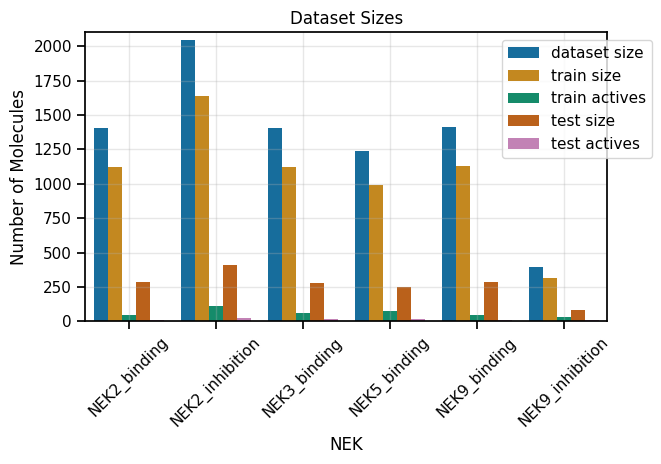

In [318]:
# melted_ratio = pd.melt(ratio_df, id_vars=['dataset','NEK', 'strategy'], value_vars=['train size',
#        'train actives', 'test size', 'test actives', 'dataset size',
#        'train active/train size', 'test active/test size',
#        'train active/total', 'test active/total'], var_name ='Metric', value_name='Value')
ratio_scaled_only = ratio_df[ratio_df['strategy']=='scaled']

melted_ratio = pd.melt(ratio_scaled_only, id_vars=['dataset','NEK', 'strategy'], value_vars=['dataset size','train size',
       'train actives', 'test size', 'test actives'], var_name ='Metric', value_name='Value')
melted_ratio
g3 = sns.barplot(x='NEK', y='Value', hue='Metric', data=melted_ratio,errorbar=None)
plt.xticks(rotation=45)
plt.ylabel('Number of Molecules')
plt.title('Dataset Sizes')
plt.tight_layout()
plt.ylim(0,2100)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.grid(True, alpha=0.3)
plt.savefig('NEK_datasetsize_plot.png')
plt.show();

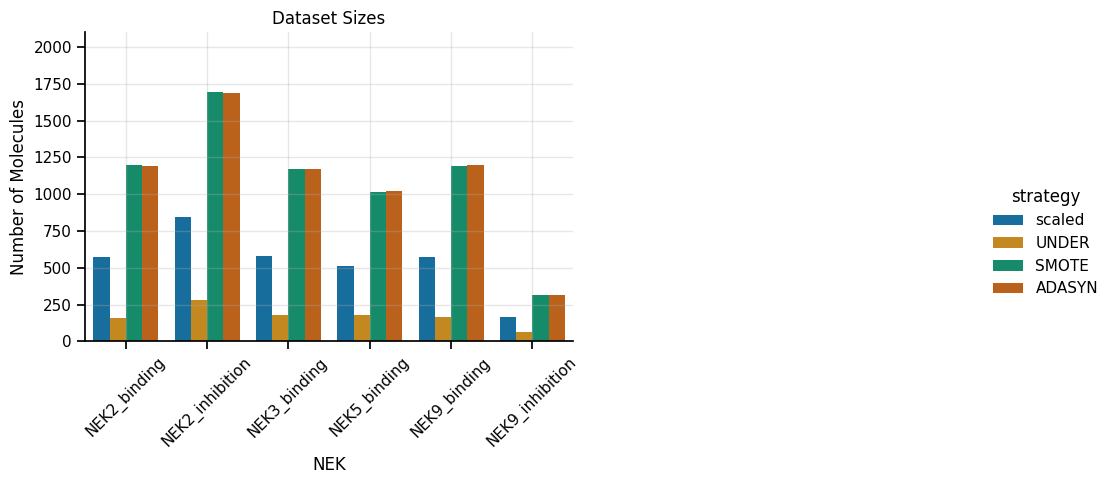

In [267]:
melted_ratio2 = pd.melt(ratio_df, id_vars=['dataset','NEK', 'feat_type', 'strategy'], value_vars=['dataset size','train size',
       'train actives', 'test size', 'test actives'], var_name ='Metric', value_name='Value')
g3 = sns.catplot(melted_ratio2, x='NEK', y='Value', hue='strategy', col='feat_type',  kind='bar', col_wrap=2,errorbar=None)
# g3a = sns.barplot(x='NEK', y='Value', hue='Metric',cols='strategy',rows='feat_type', data=melted_ratio2,errorbar=None)
plt.xticks(rotation=45)
plt.ylabel('Number of Molecules')
plt.title('Dataset Sizes')
plt.tight_layout()
plt.ylim(0,2100)
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.grid(True, alpha=0.3)
plt.show();

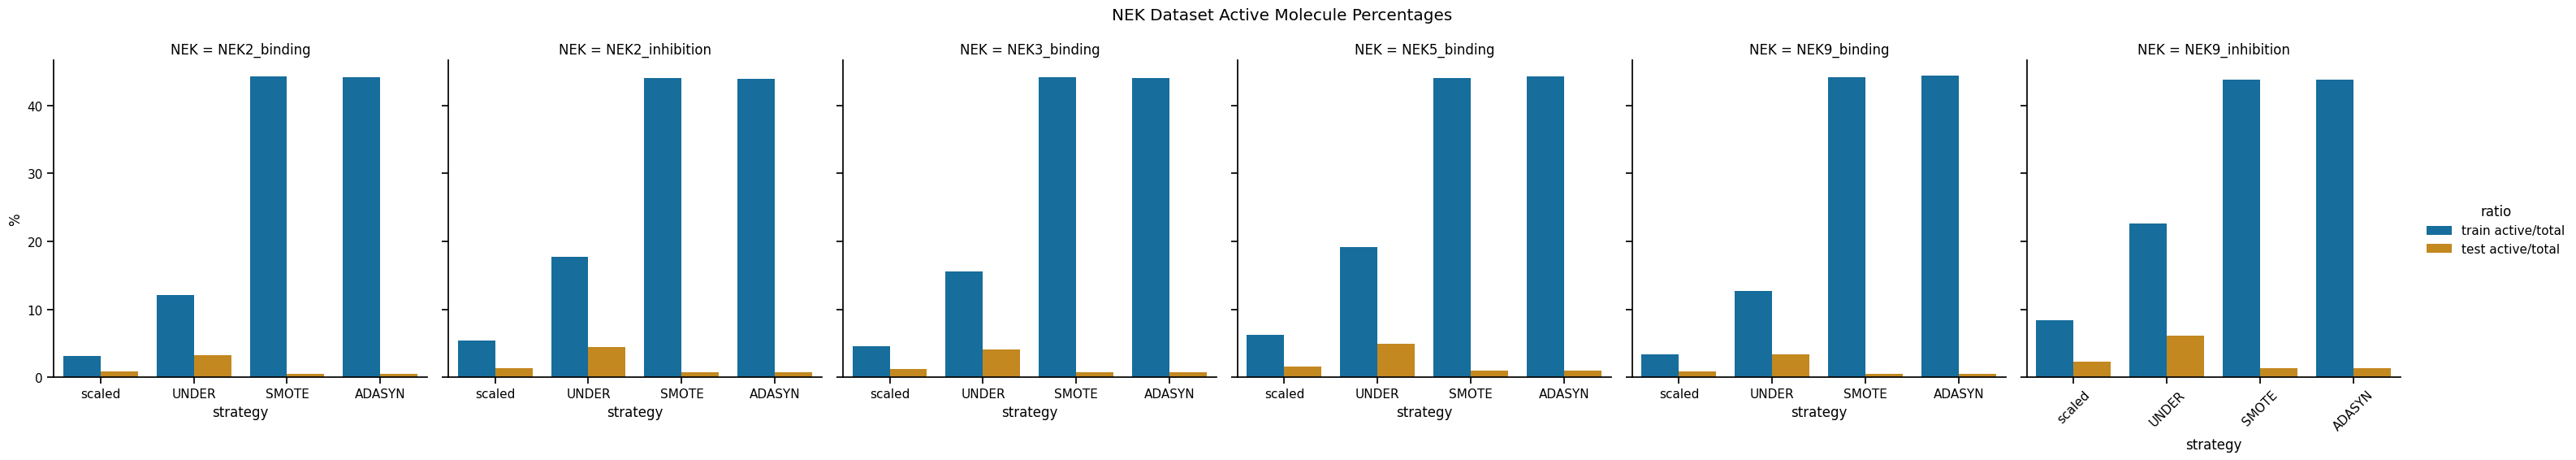

In [301]:
# melted_ratio3 = pd.melt(ratio_df, id_vars=['dataset','NEK', 'feat_type', 'strategy'], value_vars=[
#        'train active/train size', 'test active/test size',
#        'train active/total', 'test active/total'], var_name ='Metric', value_name='Value')
# melted_ratio3 = pd.melt(ratio_df, id_vars=['dataset','NEK', 'feat_type', 'strategy'], value_vars=[
#        'train active/train size', 'test active/test size'], var_name ='Metric', value_name='Value')
melted_ratio3 = pd.melt(ratio_df, id_vars=['dataset','NEK', 'feat_type', 'strategy'], value_vars=[
       'train active/total', 'test active/total'], var_name ='ratio', value_name='%')
g3 = sns.catplot(data=melted_ratio3,x='strategy', y='%',hue='ratio',col='NEK',kind='bar',errorbar=None)
plt.xticks(rotation=45)
plt.ylabel('%')
plt.suptitle('NEK Dataset Active Molecule Percentages',y=1.05)
plt.savefig('ea_NEK_dataset_ratio_plot.png')
plt.show();


# plt.show();

In [287]:
# melted_ratio3 = pd.melt(ratio_df, id_vars=['dataset','NEK', 'feat_type', 'strategy'], value_vars=[
#        'train active/train size', 'test active/test size',
#        'train active/total', 'test active/total'], var_name ='Metric', value_name='Value')
melted_ratio4 = pd.melt(ratio_df, id_vars=['dataset','NEK', 'feat_type', 'strategy'], value_vars=[
       'train active/train size', 'test active/test size'], var_name ='Metric', value_name='Value')

g4 = sns.catplot(data=melted_ratio3,x='strategy', y='%',hue='ratio',col='NEK',kind='bar',errorbar=None)
plt.xticks(rotation=45)
plt.ylabel('%')
plt.title('NEK Dataset Active Molecule Percentages')
plt.savefig('ea_NEK_dataset_ratio_plot.png')
plt.show();


# plt.show();

,dataset,NEK,feat_type,strategy,Metric,Value
0,NEK2_binding_moe_scaled,NEK2_binding,moe,scaled,train active/train size,4.000000
1,NEK2_binding_moe_UNDER,NEK2_binding,moe,UNDER,train active/train size,50.000000
2,NEK2_binding_moe_SMOTE,NEK2_binding,moe,SMOTE,train active/train size,50.000000
3,NEK2_binding_moe_ADASYN,NEK2_binding,moe,ADASYN,train active/train size,49.953661
4,NEK2_inhibition_moe_scaled,NEK2_inhibition,moe,scaled,train active/train size,6.850153
...,...,...,...,...,...,...
91,NEK9_binding_moe_ADASYN,NEK9_binding,moe,ADASYN,test active/total,0.531263
92,NEK9_inhibition_moe_scaled,NEK9_inhibition,moe,scaled,test active/total,2.290076
93,NEK9_inhibition_moe_UNDER,NEK9_inhibition,moe,UNDER,test active/total,6.164384
94,NEK9_inhibition_moe_SMOTE,NEK9_inhibition,moe,SMOTE,test active/total,1.406250


In [299]:
ratio_df.columns

Index(['dataset', 'NEK', 'feat_type', 'strategy', 'train size',
       'train actives', 'test size', 'test actives', 'dataset size',
       'train active/train size', 'test active/test size',
       'train active/total', 'test active/total'],
      dtype='object')

In [322]:
ratio_scaled_only['actives / total'] = ratio_scaled_only['total actives'] / ratio_scaled_only['dataset size']*100

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_85825/354626585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_scaled_only['actives / total'] = ratio_scaled_only['total actives'] / ratio_scaled_only['dataset size']*100


In [323]:
ratio_scaled_only

,dataset,NEK,strategy,train size,train actives,test size,test actives,dataset size,total actives,train active/train size,test active/test size,train active/total,test active/total,train inactive per active,test inactive per active,actives / total
0,NEK2_binding_moe_scaled,NEK2_binding,scaled,1125,45,283,12,1408,57,4.000000,4.240283,3.196023,0.852273,24.000000,22.583333,4.048295
8,NEK2_inhibition_moe_scaled,NEK2_inhibition,scaled,1635,112,409,28,2044,140,6.850153,6.845966,5.479452,1.369863,13.598214,13.607143,6.849315
16,NEK3_binding_moe_scaled,NEK3_binding,scaled,1122,64,282,17,1404,81,5.704100,6.028369,4.558405,1.210826,16.531250,15.588235,5.769231
24,NEK5_binding_moe_scaled,NEK5_binding,scaled,989,77,248,20,1237,97,7.785642,8.064516,6.224737,1.616815,11.844156,11.400000,7.841552
32,NEK9_binding_moe_scaled,NEK9_binding,scaled,1126,48,283,13,1409,61,4.262877,4.593640,3.406671,0.922640,22.458333,20.769231,4.329312
40,NEK9_inhibition_moe_scaled,NEK9_inhibition,scaled,313,33,80,9,393,42,10.543131,11.250000,8.396947,2.290076,8.484848,7.888889,10.687023
